## Smita Prasad


# Analysis of London Cycling Infrastructure

London’s Cycling Infrastructure Database (CID) is the world’s largest and most comprehensive database of cycling infrastructure, containing comprehensive details of cycling infrastructure in the Capital.

The CID is intended to address barriers to cycling by providing Londoners with clear and accurate information about cycling infrastructure, helping them plan cycle journeys with confidence. The CID is a core part of the Cycling Action Plan , which sets out how TfL, boroughs and others will work together to make London the world’s best big city for cycling.

The details of the Cycling Action Plan can found using this link -: 
[https://content.tfl.gov.uk/cycling-action-plan.pdf]

This notebook uses the data present for point assests datasets as part of the cycling data infrastructure using the link. [https://cycling.data.tfl.gov.uk/]

Details on the database schema can be viewed using the link [https://cycling.data.tfl.gov.uk/CyclingInfrastructure/documentation/cid_database_schema.xlsx]

### 1. Importing signage dataset

Signs and markings that provide information to cyclists about where they are going, where they can/cannot cycle, and what space has been designated for their specific use adding to the sense of safety and accessibility. Only those signs relevant to cycling are included.

Signage dataset is present as json file in the https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/ folder. We retrieve the file using requests package and then read the json in to a dataframe.

We retrieve the file and save it into the London folder on the local machine.

In [1]:
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import requests


# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/signage.json"

# Retrieve the JSON data from the URL
response = requests.get(url)
data = response.json()


# Save the JSON data as a local file
filename = "../London/signage.json"


## save the file each time after retrieval
with open(filename, "w") as file:
    file.write(response.text)

# Load the JSON data into a DataFrame
df = pd.read_json(filename)

# Display the DataFrame
print(df)

                     type     name  \
0       FeatureCollection  signage   
1       FeatureCollection  signage   
2       FeatureCollection  signage   
3       FeatureCollection  signage   
4       FeatureCollection  signage   
...                   ...      ...   
118829  FeatureCollection  signage   
118830  FeatureCollection  signage   
118831  FeatureCollection  signage   
118832  FeatureCollection  signage   
118833  FeatureCollection  signage   

                                                 features  
0       {'type': 'Feature', 'geometry': {'type': 'Poin...  
1       {'type': 'Feature', 'geometry': {'type': 'Poin...  
2       {'type': 'Feature', 'geometry': {'type': 'Poin...  
3       {'type': 'Feature', 'geometry': {'type': 'Poin...  
4       {'type': 'Feature', 'geometry': {'type': 'Poin...  
...                                                   ...  
118829  {'type': 'Feature', 'geometry': {'type': 'Poin...  
118830  {'type': 'Feature', 'geometry': {'type': 'Poin...  
118

In [3]:
# View the df
df

type     name  \
0       FeatureCollection  signage   
1       FeatureCollection  signage   
2       FeatureCollection  signage   
3       FeatureCollection  signage   
4       FeatureCollection  signage   
...                   ...      ...   
118829  FeatureCollection  signage   
118830  FeatureCollection  signage   
118831  FeatureCollection  signage   
118832  FeatureCollection  signage   
118833  FeatureCollection  signage   

                                                 features  
0       {'type': 'Feature', 'geometry': {'type': 'Poin...  
1       {'type': 'Feature', 'geometry': {'type': 'Poin...  
2       {'type': 'Feature', 'geometry': {'type': 'Poin...  
3       {'type': 'Feature', 'geometry': {'type': 'Poin...  
4       {'type': 'Feature', 'geometry': {'type': 'Poin...  
...                                                   ...  
118829  {'type': 'Feature', 'geometry': {'type': 'Poin...  
118830  {'type': 'Feature', 'geometry': {'type': 'Poin...  
118831  {'type': 'Feature', 'geometry': {'type': 'Poin...  
118832  {'type': 'Feature', 'geometry': {'type': 'Poin...  
118833  {'type': 'Feature', 'geometry': {'type': 'Poin...  

[118834 rows x 3 columns]

In [4]:
 type(df.features)

pandas.core.series.Series

In [5]:
# extract features and store it in a dictionary 
signage = df.features.to_dict()

In [10]:
# view a sample of signage 
signage[0]

{'type': 'Feature',
 'geometry': {'type': 'Point',
  'coordinates': [-0.18905827220000002, 51.54360051]},
 'properties': {'FEATURE_ID': 'RWG000976',
  'SVDATE': '2017-05-30',
  'SS_ROAD': 'FALSE',
  'SS_PATCH': 'FALSE',
  'SS_FACING': 'FALSE',
  'SS_NOCYC': 'FALSE',
  'SS_NOVEH': 'FALSE',
  'SS_CIRC': 'FALSE',
  'SS_EXEMPT': 'FALSE',
  'SS_NOLEFT': 'FALSE',
  'SS_NORIGH': 'FALSE',
  'SS_LEFT': 'FALSE',
  'SS_RIGHT': 'FALSE',
  'SS_NOEXCE': 'FALSE',
  'SS_DISMOU': 'FALSE',
  'SS_END': 'FALSE',
  'SS_CYCSMB': 'TRUE',
  'SS_PEDSMB': 'FALSE',
  'SS_BUSSMB': 'FALSE',
  'SS_SMB': 'FALSE',
  'SS_LNSIGN': 'FALSE',
  'SS_ARROW': 'TRUE',
  'SS_NRCOL': 'FALSE',
  'SS_NCN': 'FALSE',
  'SS_LCN': 'FALSE',
  'SS_SUPERH': 'FALSE',
  'SS_QUIETW': 'FALSE',
  'SS_GREENW': 'FALSE',
  'SS_ROUTEN': None,
  'SS_DESTN': 'FALSE',
  'SS_ACCESS': None,
  'SS_NAME': '960.2',
  'SS_COLOUR': 'NONE',
  'BOROUGH': 'Camden',
  'PHOTO1_URL': 'https://cycleassetimages.data.tfl.gov.uk/RWG000976_1.jpg',
  'PHOTO2_URL': 'h

In [11]:
# convert to dictionary to dataframe 
df_signage = pd.concat({k: pd.DataFrame(v).T for k, v in signage.items()}, axis=0)

In [13]:
# view df_signage
df_signage

type                            coordinates FEATURE_ID  \
0      type        Feature                                Feature    Feature   
       geometry      Point    [-0.18905827220000002, 51.54360051]        NaN   
       properties      NaN                                    NaN  RWG000976   
1      type        Feature                                Feature    Feature   
       geometry      Point  [-0.18946531360000002, 51.5556920535]        NaN   
...                    ...                                    ...        ...   
118832 geometry      Point          [-0.3631870801, 51.518055597]        NaN   
       properties      NaN                                    NaN  RWG292125   
118833 type        Feature                                Feature    Feature   
       geometry      Point         [-0.3825143924, 51.5102609053]        NaN   
       properties      NaN                                    NaN  RWG241488   

                       SVDATE  SS_ROAD SS_PATCH SS_FACING SS_NOCYC SS_NOVEH  \
0      type           Feature  Feature  Feature   Feature  Feature  Feature   
       geometry           NaN      NaN      NaN       NaN      NaN      NaN   
       properties  2017-05-30    FALSE    FALSE     FALSE    FALSE    FALSE   
1      type           Feature  Feature  Feature   Feature  Feature  Feature   
       geometry           NaN      NaN      NaN       NaN      NaN      NaN   
...                       ...      ...      ...       ...      ...      ...   
118832 geometry           NaN      NaN      NaN       NaN      NaN      NaN   
       properties  2018-04-06     TRUE    FALSE     FALSE    FALSE    FALSE   
118833 type           Feature  Feature  Feature   Feature  Feature  Feature   
       geometry           NaN      NaN      NaN       NaN      NaN      NaN   
       properties  2018-01-28    FALSE    FALSE      TRUE    FALSE    FALSE   

                   SS_CIRC  ... SS_QUIETW SS_GREENW SS_ROUTEN SS_DESTN  \
0      type        Feature  ...   Feature   Feature   Feature  Feature   
       geometry        NaN  ...       NaN       NaN       NaN      NaN   
       properties    FALSE  ...     FALSE     FALSE      None    FALSE   
1      type        Feature  ...   Feature   Feature   Feature  Feature   
       geometry        NaN  ...       NaN       NaN       NaN      NaN   
...                    ...  ...       ...       ...       ...      ...   
118832 geometry        NaN  ...       NaN       NaN       NaN      NaN   
       properties    FALSE  ...     FALSE     FALSE      None    FALSE   
118833 type        Feature  ...   Feature   Feature   Feature  Feature   
       geometry        NaN  ...       NaN       NaN       NaN      NaN   
       properties    FALSE  ...     FALSE     FALSE      None    FALSE   

                  SS_ACCESS  SS_NAME SS_COLOUR  BOROUGH  \
0      type         Feature  Feature   Feature  Feature   
       geometry         NaN      NaN       NaN      NaN   
       properties      None    960.2      NONE   Camden   
1      type         Feature  Feature   Feature  Feature   
       geometry         NaN      NaN       NaN      NaN   
...                     ...      ...       ...      ...   
118832 geometry         NaN      NaN       NaN      NaN   
       properties      None     1057      NONE   Ealing   
118833 type         Feature  Feature   Feature  Feature   
       geometry         NaN      NaN       NaN      NaN   
       properties      None    960.2      NONE   Ealing   

                                                          PHOTO1_URL  \
0      type                                                  Feature   
       geometry                                                  NaN   
       properties  https://cycleassetimages.data.tfl.gov.uk/RWG00...   
1      type                                                  Feature   
       geometry                                                  NaN   
...                                                              ...   
118832 geo

In [14]:
# view the index
df_signage.index

MultiIndex([(     0,       'type'),
            (     0,   'geometry'),
            (     0, 'properties'),
            (     1,       'type'),
            (     1,   'geometry'),
            (     1, 'properties'),
            (     2,       'type'),
            (     2,   'geometry'),
            (     2, 'properties'),
            (     3,       'type'),
            ...
            (118830, 'properties'),
            (118831,       'type'),
            (118831,   'geometry'),
            (118831, 'properties'),
            (118832,       'type'),
            (118832,   'geometry'),
            (118832, 'properties'),
            (118833,       'type'),
            (118833,   'geometry'),
            (118833, 'properties')],
           length=356502)

### Viewing a sample signage to understand the data
We can access the coordinates and a sample photograph of a signage using the url in the df

In [15]:
# view the coordinates of the first element
df_signage.loc[(0,'geometry')].coordinates

[-0.18905827220000002, 51.54360051]

In [16]:
# view the sample photo of the first element
df_signage.loc[(0,'properties')].PHOTO1_URL

'https://cycleassetimages.data.tfl.gov.uk/RWG000976_1.jpg'

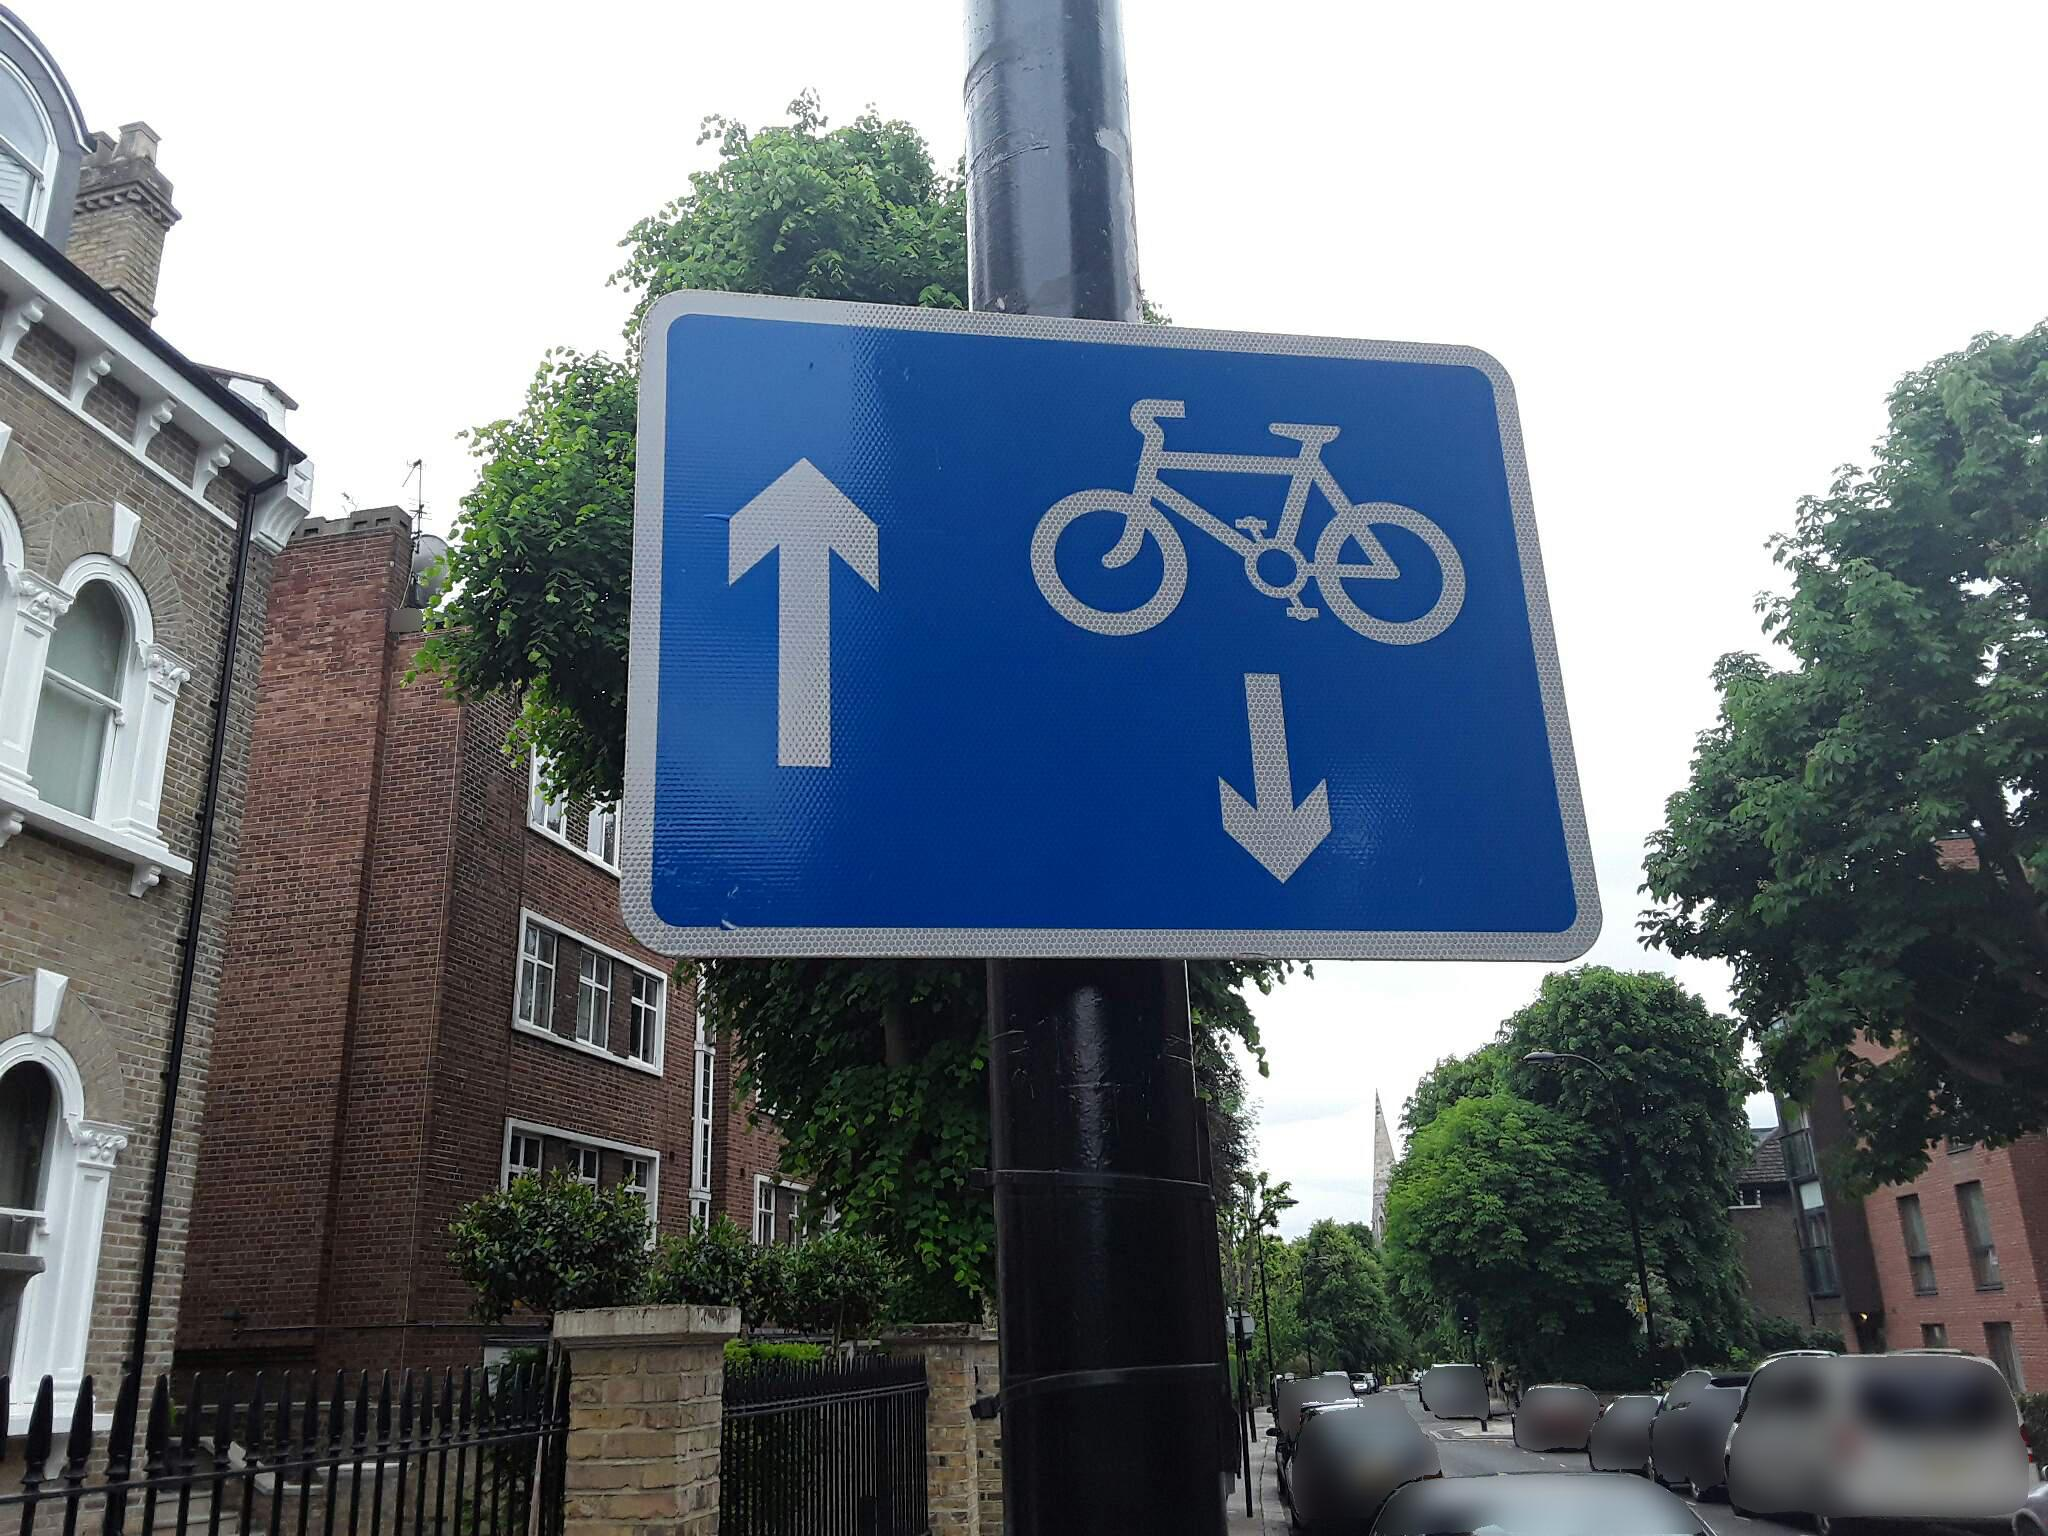

In [17]:
import IPython.display as Disp
url_photo = 'https://cycleassetimages.data.tfl.gov.uk/RWG000976_1.jpg'
Disp.Image(requests.get(url_photo).content)

### Visualise the borough wise count of signages

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# set parameters for visualizations
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (20.0, 15.0)
plt.rc('axes', labelsize=12)  

Text(0.5, 1.0, 'Signage count Borough wise')

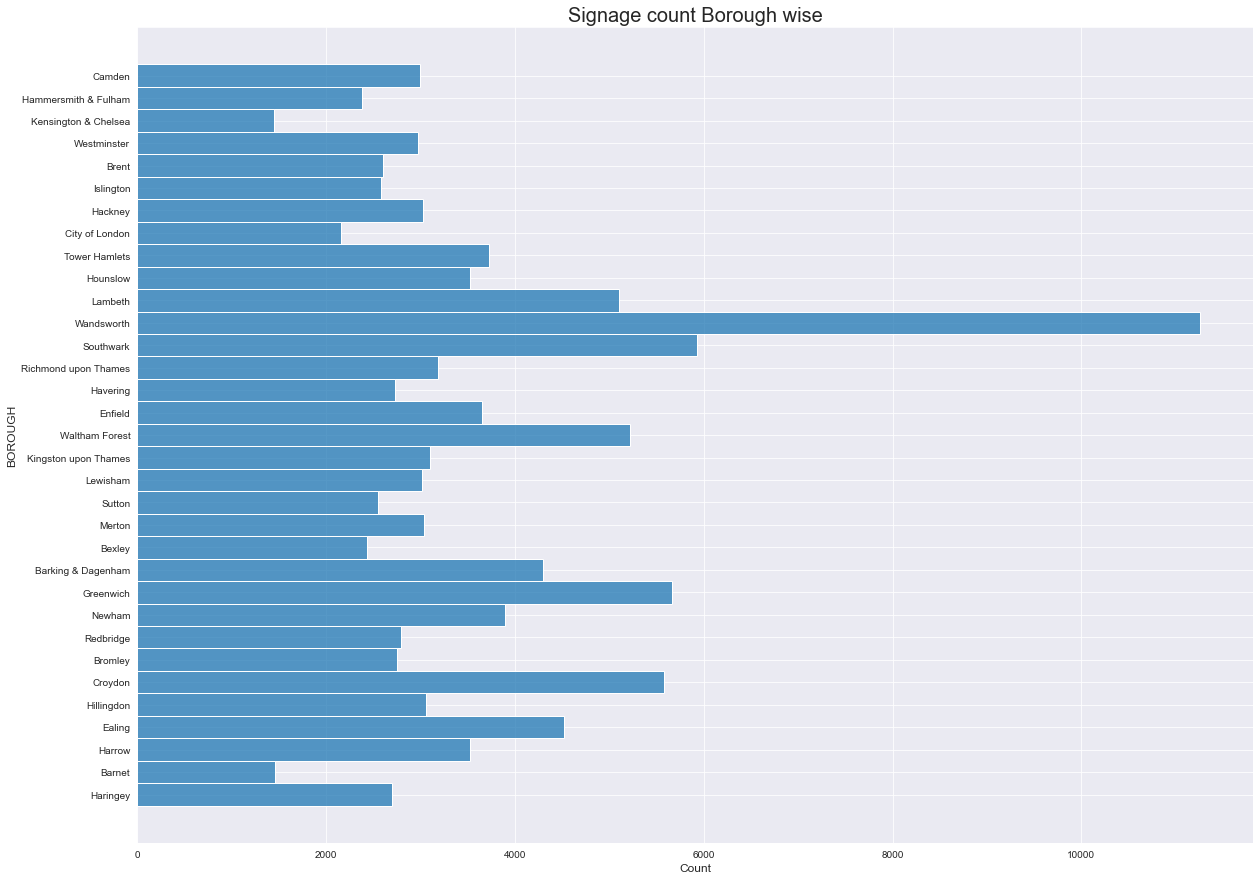

In [19]:
df_signages_borough = df_signage.loc(axis=0)[:,('properties')].BOROUGH.value_counts() 
fig,ax = plt.subplots()
sns.histplot(df_signage.loc(axis=0)[:,('properties')],y='BOROUGH')
ax.set_title('Signage count Borough wise', fontsize=20)

## Visualising the data on a map of London

Uncomment and Install the following packages for viewing geospatial info if not already installed

In [20]:
#!pip3 install basemap
#!pip3 install basemap-data-hires

In [21]:
sign_xy = list()
for i in range(1,6):
    print(df_signage.loc[(i,'geometry')].coordinates)
    sign_xy.append(df_signage.loc[(i,'geometry')].coordinates)
    

[-0.18946531360000002, 51.5556920535]
[-0.1895015672, 51.555450084]
[-0.1495089292, 51.5478587721]
[-0.1495112338, 51.5478893368]
[-0.18911916450000002, 51.5532740707]


In [22]:
len(sign_xy)

5

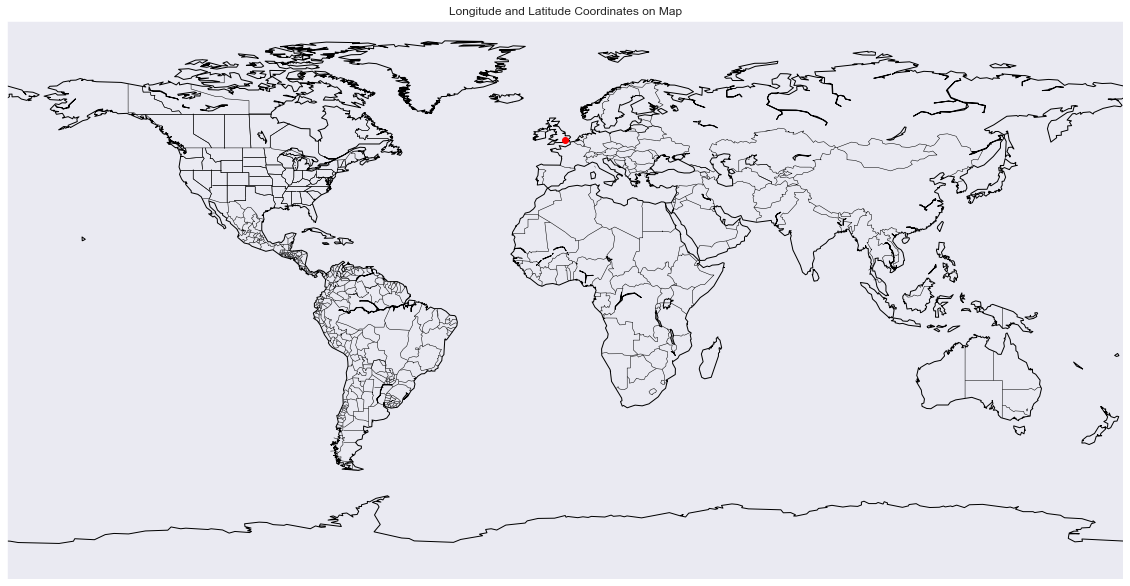

In [23]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Longitude and latitude coordinates of a signage from above
sign_x,sign_y=-0.18946531360000002, 51.5556920535

# Create a Basemap instance
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')
# Draw coastlines, countries, and states

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert coordinates to map projection
x, y = m(sign_x,sign_y)

# Plot the coordinates on the map
m.scatter(x, y, marker='o', color='red', zorder=5)

# Show the map
plt.title('Longitude and Latitude Coordinates on Map')
plt.show()

#the projection parameter of the Basemap instance is set to 'cyl', 
#which refers to the Plate Carrée projection. 



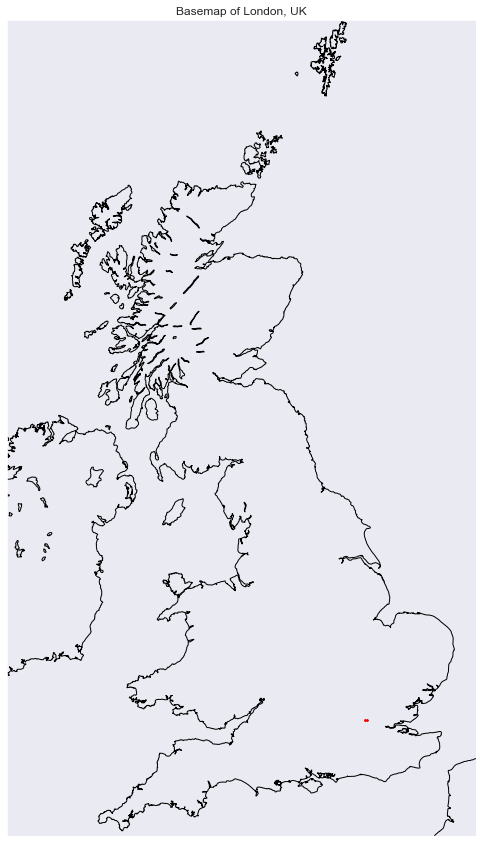

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a basemap instance centered around London
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
            urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='h',
            projection='cass',
            lon_0=0.08,lat_0=51.53)
            #epsg=27700)
london_coords = (51.53, 0.08)  # Latitude and Longitude of London
#m = Basemap(llcrnrlon=-7.56, llcrnrlat=50, urcrnrlon=2.7, urcrnrlat=60,
            #resolution='c', projection='merc', lat_0=london_coords[0], lon_0=london_coords[1])

# Draw coastlines, countries, and states
m.drawcoastlines()
#m.drawcountries()
#m.drawstates()

# Longitude and latitude coordinates
sign_x,sign_y=-0.18946531360000002, 51.5556920535
#x, y = m([x for x,y in sign_xy],[y for x,y in sign_xy])
# Convert coordinates to map projection
x, y = m(sign_x,sign_y)

# Plot the coordinates on the map
#m.scatter(x, y, marker='*', color='red', zorder=5)

for i in sign_xy:
    x,y = m(i[0],i[1])
    m.plot(x, y, marker = '*', c='r', markersize=2, alpha=0.8, latlon=False)


#m.scatter(x, y, marker='*', color='red')

# Draw a title
plt.title('Basemap of London, UK')

# Show the plot

plt.show()


 ** Fix needed :  zooming into London Borough map further and plotting all the points on the map 

### Visualise maps using alternate method : geopandas

In [25]:
#!pip install geopandas

To display the ap of london with borough boundaries outlined , we will use the geopandas package and a shapefile. 
The shapefile format is a geospatial vector data format for geographic information system software. It is developed and regulated by Esri as a mostly open specification for data interoperability among Esri and other GIS software products.[https://en.wikipedia.org/wiki/Shapefile]

The GIS files for London are available using the following link : [https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london]

<AxesSubplot:>

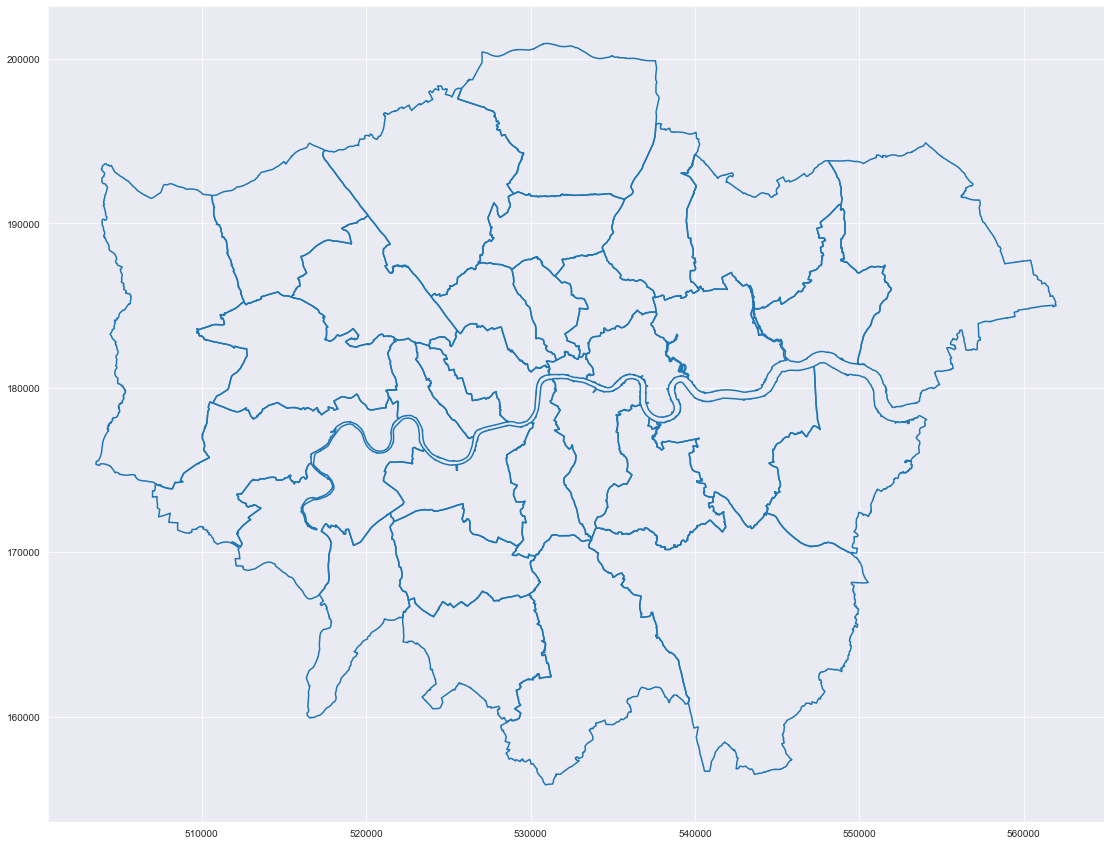

In [26]:
import geopandas as gpd
fp = '../London/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
# Load London Boroughs shapefile to show borders on map
map_df = gpd.read_file(fp)
# Plot the geodataframe
map_df.boundary.plot()

In [27]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
1               Croydon  E09000008   8649.441       0.000         F       NaN   
2               Bromley  E09000006  15013.487       0.000         F       NaN   
3              Hounslow  E09000018   5658.541      60.755         F       NaN   
4                Ealing  E09000009   5554.428       0.000         F       NaN   

   SUB_2006                                           geometry  
0       NaN  POLYGON ((516401.600 160201.800, 516407.300 16...  
1       NaN  POLYGON ((535009.200 159504.700, 535005.500 15...  
2       NaN  POLYGON ((540373.600 157530.400, 540361.200 15...  
3       NaN  POLYGON ((521975.800 178100.000, 521967.700 17...  
4       NaN  POLYGON ((510253.500 182881.600, 510249.900 18...

In [28]:
# view the signages borough value counts
df_signages_borough

Wandsworth              11258
Southwark                5925
Greenwich                5667
Croydon                  5581
Waltham Forest           5223
Lambeth                  5101
Ealing                   4516
Barking & Dagenham       4295
Newham                   3891
Tower Hamlets            3720
Enfield                  3650
Harrow                   3528
Hounslow                 3521
Richmond upon Thames     3180
Kingston upon Thames     3095
Hillingdon               3056
Merton                   3032
Hackney                  3027
Lewisham                 3019
Camden                   2996
Westminster              2976
Redbridge                2791
Bromley                  2752
Havering                 2731
Haringey                 2698
Brent                    2599
Islington                2584
Sutton                   2547
Bexley                   2432
Hammersmith & Fulham     2381
City of London           2156
Barnet                   1460
Kensington & Chelsea     1444
Name: BORO

In [29]:
df_signages_borough=pd.DataFrame(df_signages_borough)
df_signages_borough=df_signages_borough.reset_index()
df_signages_borough=df_signages_borough.rename(columns={'index':'Borough','BOROUGH':'signage_count'})


In [30]:
df_signages_borough.head()

Borough  signage_count
0      Wandsworth          11258
1       Southwark           5925
2       Greenwich           5667
3         Croydon           5581
4  Waltham Forest           5223

In [31]:
merged = map_df.set_index('NAME').join(df_signages_borough.set_index('Borough'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
NAME                                                                         
Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
Croydon               E09000008   8649.441       0.000         F       NaN   
Bromley               E09000006  15013.487       0.000         F       NaN   
Hounslow              E09000018   5658.541      60.755         F       NaN   
Ealing                E09000009   5554.428       0.000         F       NaN   

                      SUB_2006  \
NAME                             
Kingston upon Thames       NaN   
Croydon                    NaN   
Bromley                    NaN   
Hounslow                   NaN   
Ealing                     NaN   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      signage_count  
NAME                                 
Kingston upon Thames         3095.0  
Croydon                      5581.0  
Bromley                      2752.0  
Hounslow                     3521.0  
Ealing                       4516.0

In [32]:
merged.loc["Wandsworth"]

GSS_CODE                                                 E09000032
HECTARES                                                  3522.022
NONLD_AREA                                                    95.6
ONS_INNER                                                        T
SUB_2009                                                       NaN
SUB_2006                                                       NaN
geometry         POLYGON ((523489.6 176224.8, 523500.6 176218.4...
signage_count                                              11258.0
Name: Wandsworth, dtype: object

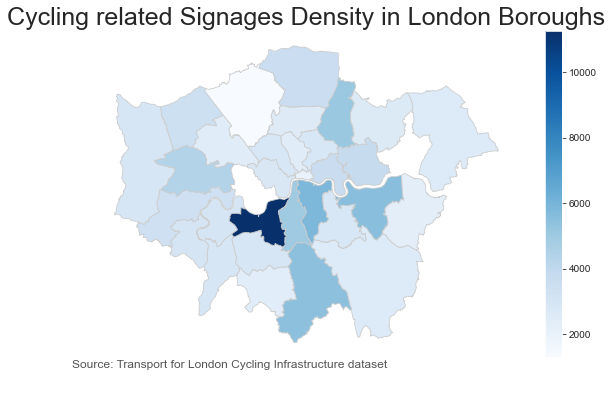

In [33]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'signage_count'
# set the range for the choropleth
vmin, vmax = df_signages_borough.signage_count.max(), df_signages_borough.signage_count.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Cycling related Signages Density in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

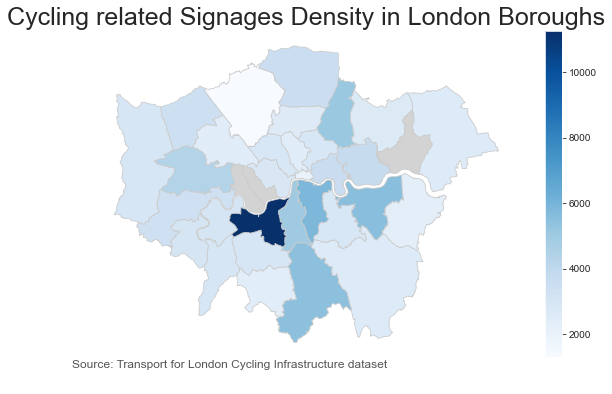

In [34]:

# to make the boroughs with mossing data appear light grey 
# add missing_kwds = {"color":"lightgrey"} in the plot fuction 

# set a variable that will call whatever column we want to visualise on the map
variable = 'signage_count'
# set the range for the choropleth
vmin, vmax = df_signages_borough.signage_count.max(), df_signages_borough.signage_count.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds = {"color":"lightgrey"})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Cycling related Signages Density in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

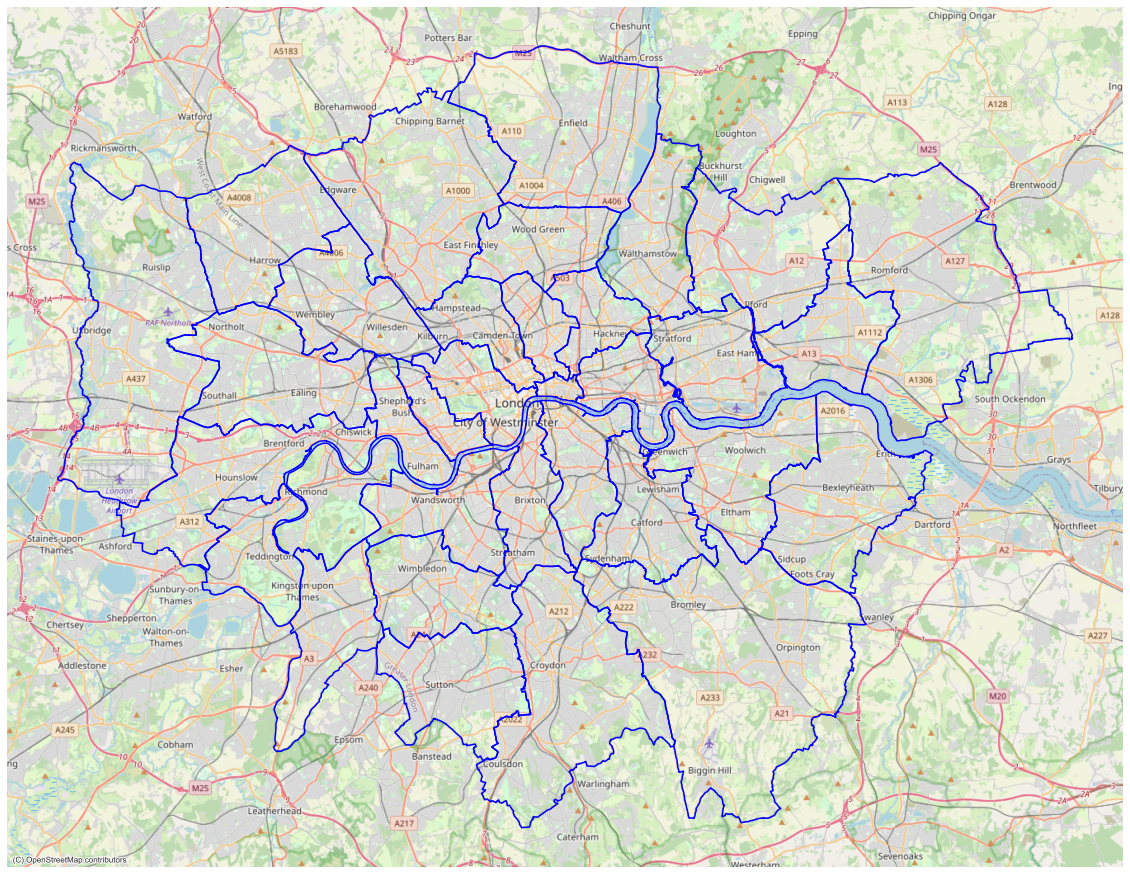

In [35]:
# Quick map: Geopandas data on top of Contextily base layer
# This code snippet is for use in Jupyter notebooks to plot geodataframe on top of a dynamic basemap

# Imports
import geopandas as gpd
# Matplotlib pyplot for mapping
import matplotlib.pyplot as plt
# Contextily for basemaps
import contextily as ctx
from shapely.geometry import Point

#using some coordinates from the signage data for example sign_xy to plot on the map
long =[-0.18946531360000002, -0.1895015672, -0.1495089292, -0.1495112338,-0.18911916450000002,-0.1278]
lat = [51.5556920535, 51.555450084, 51.5478587721, 51.5478893368,51.5532740707,51.5074]
geometry = [Point(xy) for xy in zip(long,lat)]

# Load data: The map data here is a London Boroughs shapefile:
 # Replace this with local filepath/name
gdf = gpd.read_file(fp) # Read file into a geodataframe

geo_df = gpd.GeoDataFrame(geometry = geometry)

# Plot geodataframe on top of Contextily base map:
# Convert to EPSG 3857 to match the contextily CRS
gdf = gdf.to_crs(epsg=3857)
geo_df.crs = {'init':"epsg:3857"}



# Plot the map
ax = gdf.boundary.plot(figsize=(20, 20),alpha=1.0, edgecolor='blue',zorder=1)
#ax=gdf.plot(alpha=1.0, color='blue',zorder=1,figsize=(20, 20))
#ax = gpd.GeoSeries(gdf['geometry'].unary_union).boundary.plot(figsize=(20, 20),ax=ax, alpha=1.0, edgecolor='blue',zorder=2)
# plot the marker
#ax = geo_df.plot(ax=ax,markersize = 20, color = 'red',marker = '*',label = 'London', zorder=2)
#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

** Fix needed - plot the signage coordinates as points on the map 

### 2. Importing traffic calming measures dataset
Traffic calming measures that are intended to reduce the speed of motor vehicles. It generally comprises vertical and horizontal deflections. Traffic calming assets were recorded for on-carriageway features. For example, speed humps on fully segregated cycle lanes should not be captured. 

Traffic calming assets dataset is present as json file in the https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/ folder. We retrieve the file using requests package and then read the json in to a dataframe.

We retrieve the file and save it into the London folder on the local machine.

In [36]:
import pandas as pd
import requests

# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/traffic_calming.json"

# Retrieve the JSON data from the URL
response = requests.get(url)
data = response.json()

# Save the JSON data as a local file
filename = "../London/traffic_calming.json"

with open(filename, "w") as file:
    file.write(response.text)

# Load the JSON data into a DataFrame
df = pd.read_json(filename)

# Display the DataFrame
df

type             name  \
0      FeatureCollection  traffic_calming   
1      FeatureCollection  traffic_calming   
2      FeatureCollection  traffic_calming   
3      FeatureCollection  traffic_calming   
4      FeatureCollection  traffic_calming   
...                  ...              ...   
58560  FeatureCollection  traffic_calming   
58561  FeatureCollection  traffic_calming   
58562  FeatureCollection  traffic_calming   
58563  FeatureCollection  traffic_calming   
58564  FeatureCollection  traffic_calming   

                                                features  
0      {'type': 'Feature', 'geometry': {'type': 'Poin...  
1      {'type': 'Feature', 'geometry': {'type': 'Poin...  
2      {'type': 'Feature', 'geometry': {'type': 'Poin...  
3      {'type': 'Feature', 'geometry': {'type': 'Poin...  
4      {'type': 'Feature', 'geometry': {'type': 'Poin...  
...                                                  ...  
58560  {'type': 'Feature', 'geometry': {'type': 'Poin...  
58561  {'type': 'Feature', 'geometry': {'type': 'Poin...  
58562  {'type': 'Feature', 'geometry': {'type': 'Poin...  
58563  {'type': 'Feature', 'geometry': {'type': 'Poin...  
58564  {'type': 'Feature', 'geometry': {'type': 'Poin...  

[58565 rows x 3 columns]

In [37]:
# extract the features
traffic_calm = df.features.to_dict()

In [38]:
#convert to df
df_traffic_calm = pd.concat({k: pd.DataFrame(v).T for k, v in traffic_calm.items()}, axis=0)

In [39]:
# view the df
df_traffic_calm

type                            coordinates FEATURE_ID  \
0     type        Feature                                Feature    Feature   
      geometry      Point         [-0.1741789436, 51.5553017001]        NaN   
      properties      NaN                                    NaN  RWG001968   
1     type        Feature                                Feature    Feature   
      geometry      Point         [-0.1757749508, 51.5516771201]        NaN   
...                   ...                                    ...        ...   
58563 geometry      Point  [-0.10131615320000001, 51.5779689062]        NaN   
      properties      NaN                                    NaN  RWG288196   
58564 type        Feature                                Feature    Feature   
      geometry      Point         [-0.1014139077, 51.5826210769]        NaN   
      properties      NaN                                    NaN  RWG288273   

                      SVDATE TRF_RAISED TRF_ENTRY TRF_CUSHI TRF_HUMP  \
0     type           Feature    Feature   Feature   Feature  Feature   
      geometry           NaN        NaN       NaN       NaN      NaN   
      properties  2017-05-29      FALSE      TRUE     FALSE    FALSE   
1     type           Feature    Feature   Feature   Feature  Feature   
      geometry           NaN        NaN       NaN       NaN      NaN   
...                      ...        ...       ...       ...      ...   
58563 geometry           NaN        NaN       NaN       NaN      NaN   
      properties  2018-02-24      FALSE     FALSE     FALSE     TRUE   
58564 type           Feature    Feature   Feature   Feature  Feature   
      geometry           NaN        NaN       NaN       NaN      NaN   
      properties  2018-02-24      FALSE     FALSE     FALSE     TRUE   

                 TRF_SINUSO TRF_BARIER TRF_NAROW TRF_CALM   BOROUGH  \
0     type          Feature    Feature   Feature  Feature   Feature   
      geometry          NaN        NaN       NaN      NaN       NaN   
      properties      FALSE      FALSE     FALSE    FALSE    Camden   
1     type          Feature    Feature   Feature  Feature   Feature   
      geometry          NaN        NaN       NaN      NaN       NaN   
...                     ...        ...       ...      ...       ...   
58563 geometry          NaN        NaN       NaN      NaN       NaN   
      properties      FALSE      FALSE     FALSE    FALSE  Haringey   
58564 type          Feature    Feature   Feature  Feature   Feature   
      geometry          NaN        NaN       NaN      NaN       NaN   
      properties      FALSE      FALSE     FALSE    FALSE  Haringey   

                                                         PHOTO1_URL  \
0     type                                                  Feature   
      geometry                                                  NaN   
      properties  https://cycleassetimages.data.tfl.gov.uk/RWG00...   
1     type                                                  Feature   
      geometry                                                  NaN   
...                                                             ...   
58563 geometry                                                  NaN   
      properties  https://cycleassetimages.data.tfl.gov.uk/RWG28...   
58564 type                                                  Feature   
      geometry                                                  NaN   
      properties  https://cycleassetimages.data.tfl.gov.uk/RWG28...   

                                                         PHOTO2_URL  
0     type                                                  Feature  
      geometry                                                  NaN  
      properties  https://cycleassetimages.data.tfl.gov.uk/RWG00...  
1     type                                                  Feature  
      geometry                                                  NaN  
...                                                             ...  
58563 geome

View a sample traffic calming measure to understand the data
We can access the coordinates and a sample photograph of an asset using the url in the df


In [40]:

# view the coordinates of the first element
df_traffic_calm.loc[(0,'geometry')].coordinates



[-0.1741789436, 51.5553017001]

In [41]:
# view the sample photo of the first element
df_traffic_calm.loc[(0,'properties')].PHOTO1_URL



'https://cycleassetimages.data.tfl.gov.uk/RWG001968_1.jpg'

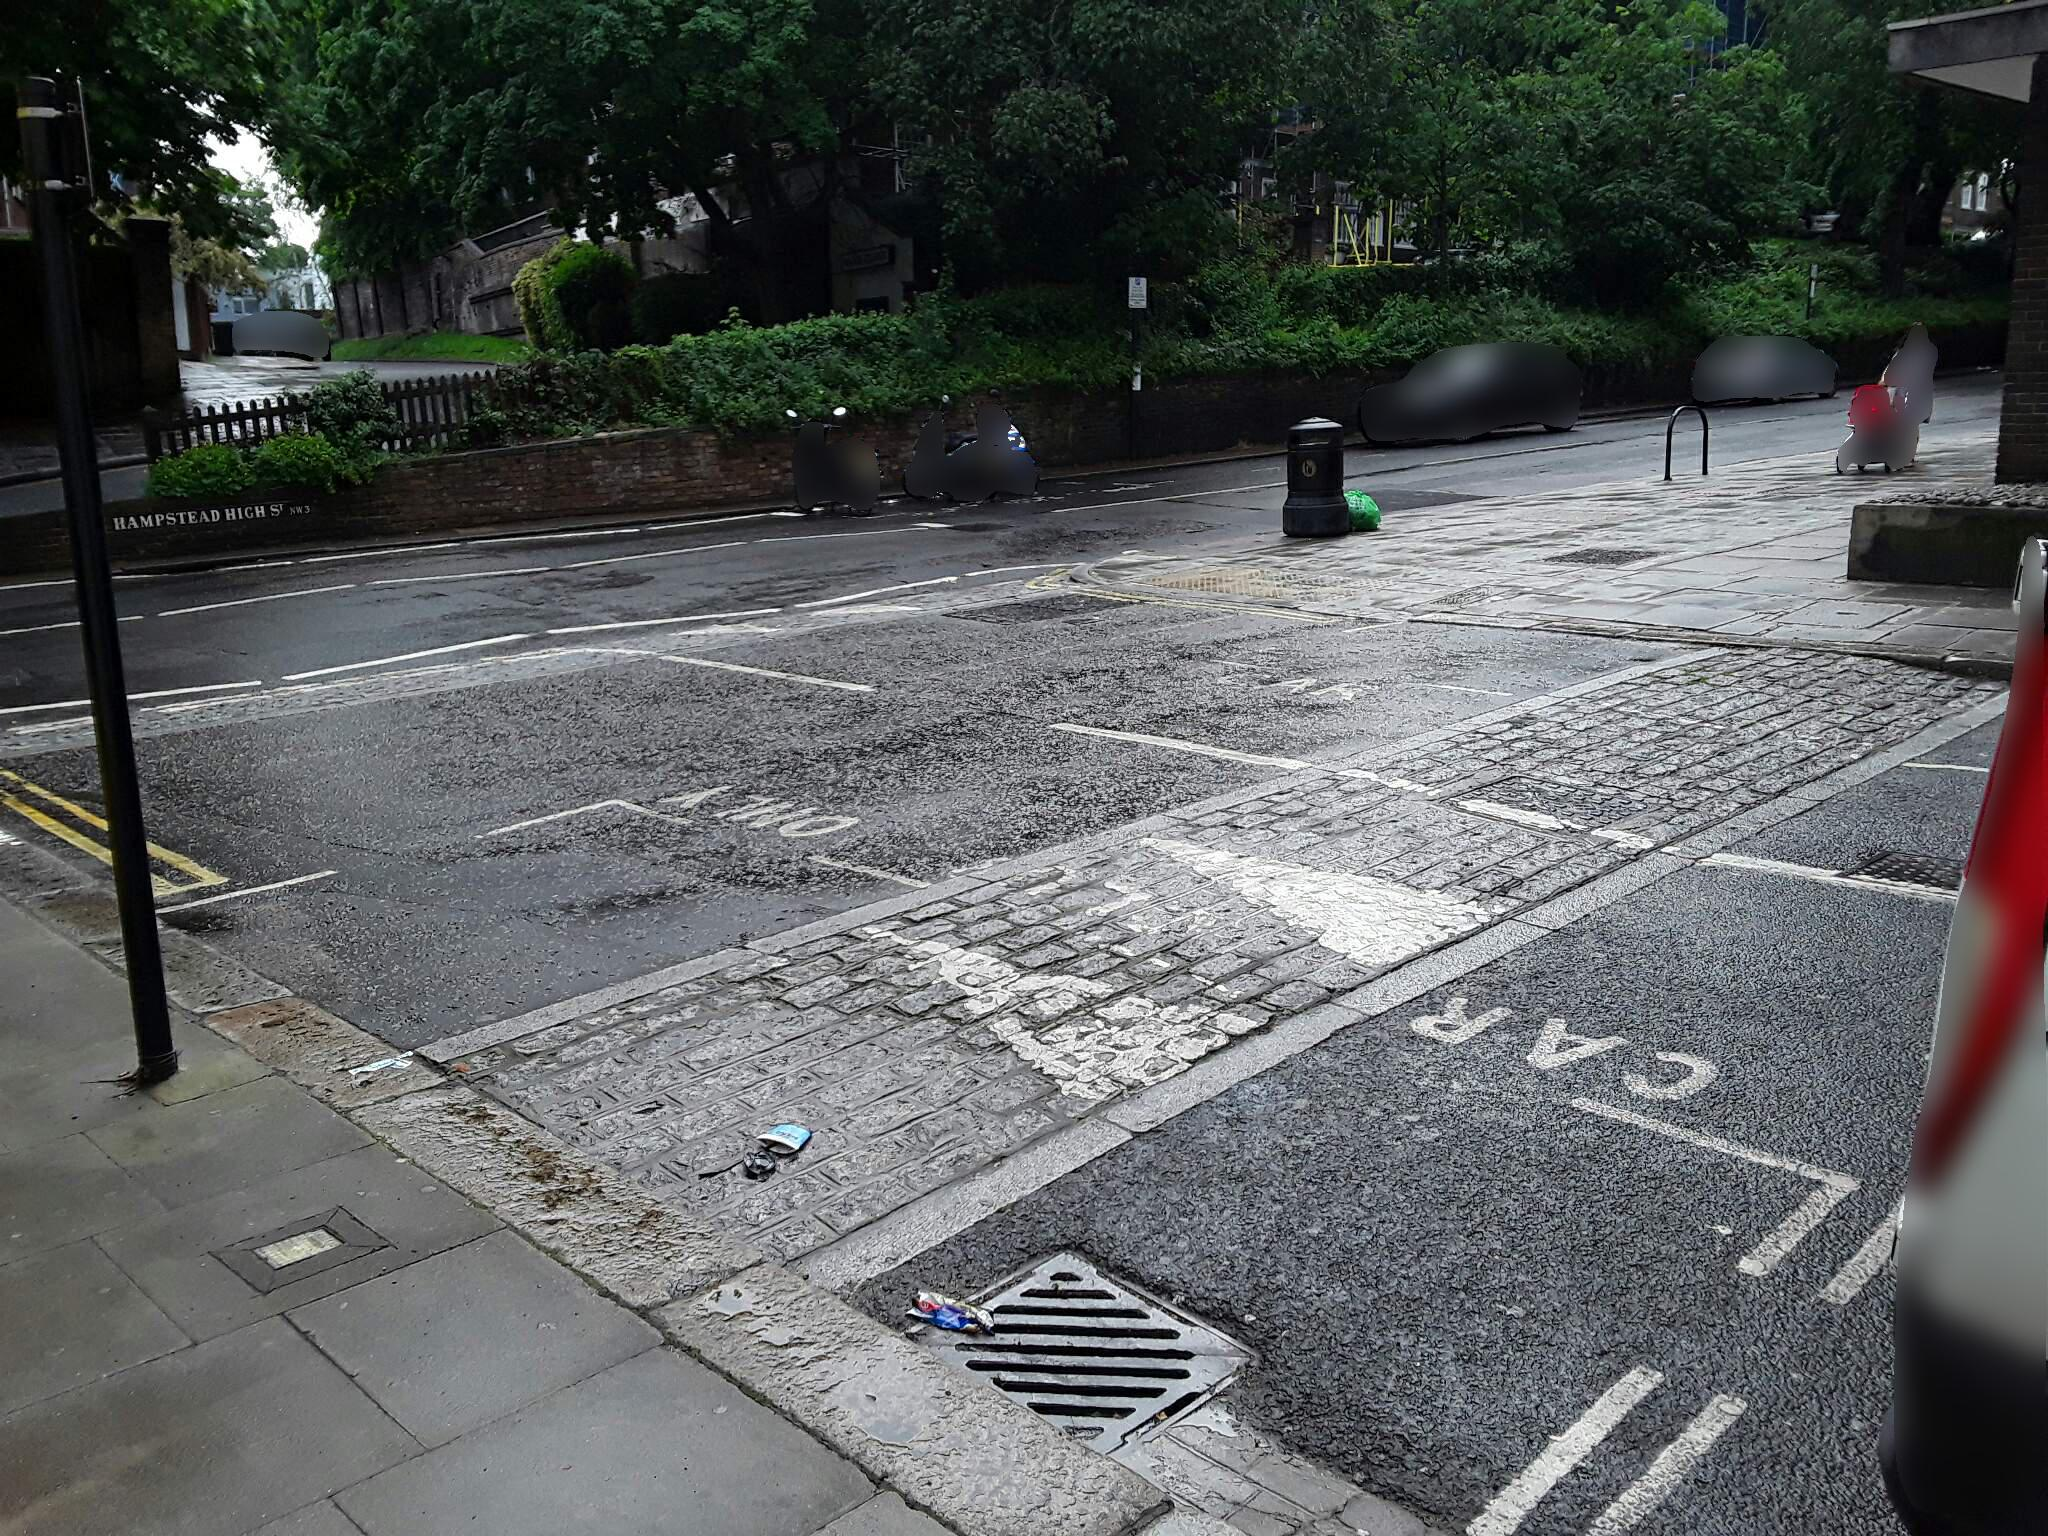

In [42]:

import IPython.display as Disp
url_photo = 'https://cycleassetimages.data.tfl.gov.uk/RWG001968_1.jpg'
Disp.Image(requests.get(url_photo).content)

### Visualise the borough wise count of Traffic Calming Measures

Text(0.5, 1.0, 'Traffic Calming Measures Borough Wise')

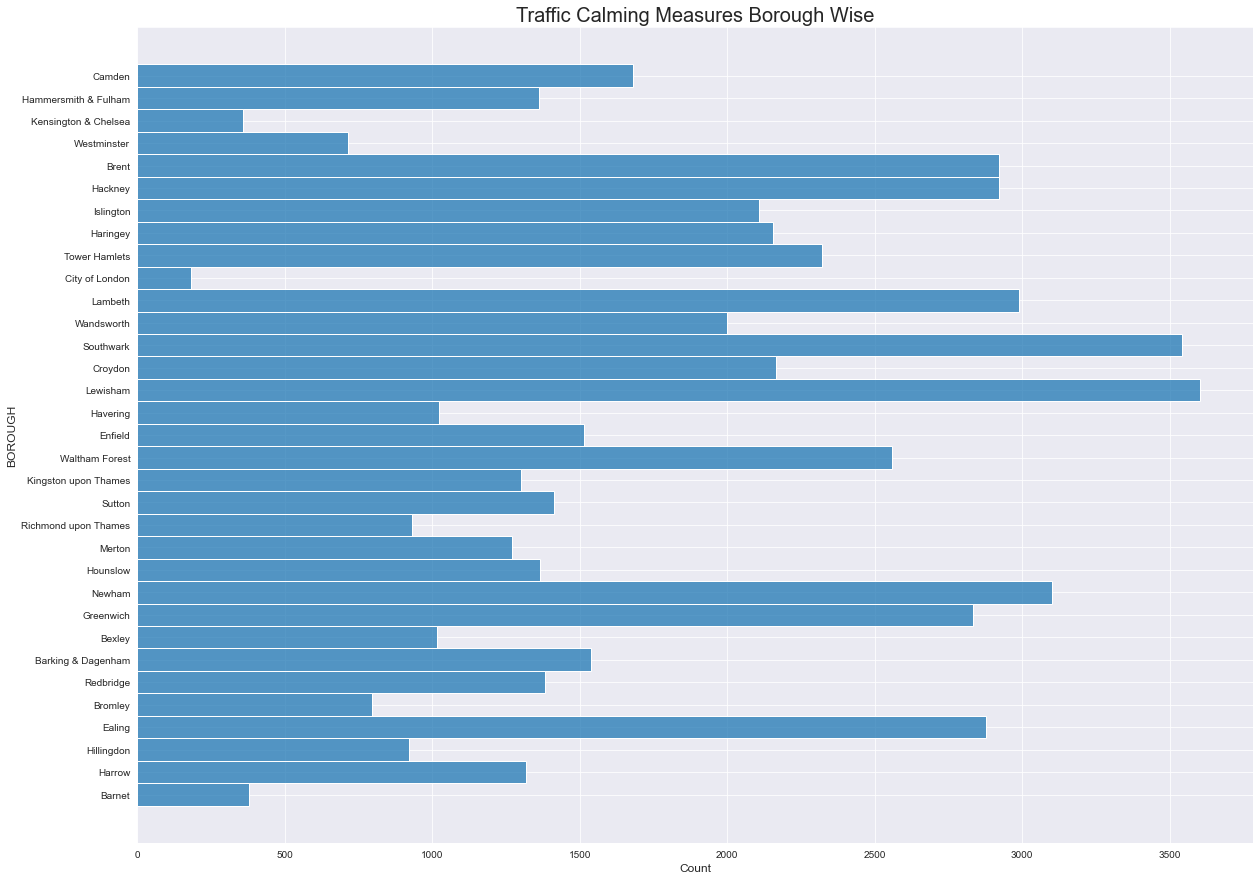

In [43]:

df_traffic_calm_borough = df_traffic_calm.loc(axis=0)[:,('properties')].BOROUGH.value_counts() 
fig,ax = plt.subplots()
sns.histplot(df_traffic_calm.loc(axis=0)[:,('properties')],y='BOROUGH')
ax.set_title('Traffic Calming Measures Borough Wise', fontsize=20)

In [44]:
# convert the value counts borough wise to a df
df_traffic_calm_borough=pd.DataFrame(df_traffic_calm_borough)
df_traffic_calm_borough=df_traffic_calm_borough.reset_index()
df_traffic_calm_borough=df_traffic_calm_borough.rename(columns={'index':'Borough','BOROUGH':'tr_calm_count'})


In [45]:
# view the borough counts
df_traffic_calm_borough

Borough  tr_calm_count
0               Lewisham           3604
1              Southwark           3542
2                 Newham           3103
3                Lambeth           2989
4                Hackney           2923
5                  Brent           2921
6                 Ealing           2879
7              Greenwich           2834
8         Waltham Forest           2558
9          Tower Hamlets           2320
10               Croydon           2167
11              Haringey           2156
12             Islington           2108
13            Wandsworth           2001
14                Camden           1681
15    Barking & Dagenham           1539
16               Enfield           1513
17                Sutton           1413
18             Redbridge           1381
19              Hounslow           1365
20  Hammersmith & Fulham           1362
21                Harrow           1318
22  Kingston upon Thames           1300
23                Merton           1269
24              Havering           1024
25                Bexley           1015
26  Richmond upon Thames            930
27            Hillingdon            920
28               Bromley            795
29           Westminster            716
30                Barnet            377
31  Kensington & Chelsea            360
32        City of London            182

In [46]:
merged = merged.join(df_traffic_calm_borough.set_index('Borough'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
NAME                                                                         
Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
Croydon               E09000008   8649.441       0.000         F       NaN   
Bromley               E09000006  15013.487       0.000         F       NaN   
Hounslow              E09000018   5658.541      60.755         F       NaN   
Ealing                E09000009   5554.428       0.000         F       NaN   

                      SUB_2006  \
NAME                             
Kingston upon Thames       NaN   
Croydon                    NaN   
Bromley                    NaN   
Hounslow                   NaN   
Ealing                     NaN   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      signage_count  tr_calm_count  
NAME                                                
Kingston upon Thames         3095.0         1300.0  
Croydon                      5581.0         2167.0  
Bromley                      2752.0          795.0  
Hounslow                     3521.0         1365.0  
Ealing                       4516.0         2879.0

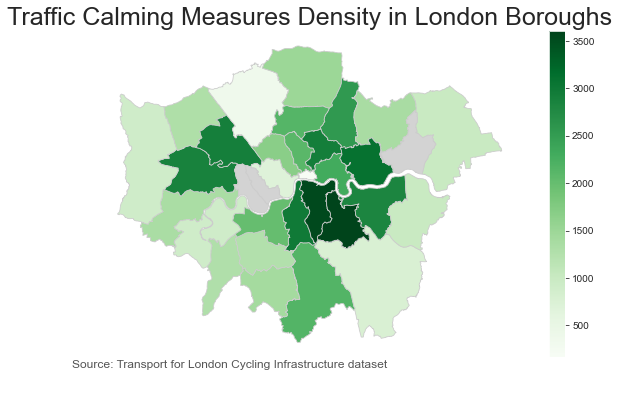

In [47]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'tr_calm_count'
# set the range for the choropleth
vmin, vmax = df_traffic_calm_borough.tr_calm_count.max(), df_traffic_calm_borough.tr_calm_count.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds = {"color":"lightgrey"})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Traffic Calming Measures Density in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

### 3. Importing and Visualising the Signals Dataset

Traffic signals at which there are specific benefits for cyclists, which includes signals that have been designed or reprogrammed so that the phasing gives advantage to cyclists and improves their safety moving through the junction.

Signals dataset is present as json file in the https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/ folder. We retrieve the file using requests package and then read the json in to a dataframe.

We retrieve the file and save it into the London folder on the local machine.

In [48]:
import pandas as pd
import requests


# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/signal.json"

# Retrieve the JSON data from the URL
response = requests.get(url)
data = response.json()


# Save the JSON data as a local file
filename = "../London/signal.json"


## save the file each time after retrieval
with open(filename, "w") as file:
    file.write(response.text)

# Load the JSON data into a DataFrame
df = pd.read_json(filename)

# Display the DataFrame
print(df)

                  type    name  \
0    FeatureCollection  signal   
1    FeatureCollection  signal   
2    FeatureCollection  signal   
3    FeatureCollection  signal   
4    FeatureCollection  signal   
..                 ...     ...   
438  FeatureCollection  signal   
439  FeatureCollection  signal   
440  FeatureCollection  signal   
441  FeatureCollection  signal   
442  FeatureCollection  signal   

                                              features  
0    {'type': 'Feature', 'geometry': {'type': 'Poin...  
1    {'type': 'Feature', 'geometry': {'type': 'Poin...  
2    {'type': 'Feature', 'geometry': {'type': 'Poin...  
3    {'type': 'Feature', 'geometry': {'type': 'Poin...  
4    {'type': 'Feature', 'geometry': {'type': 'Poin...  
..                                                 ...  
438  {'type': 'Feature', 'geometry': {'type': 'Poin...  
439  {'type': 'Feature', 'geometry': {'type': 'Poin...  
440  {'type': 'Feature', 'geometry': {'type': 'Poin...  
441  {'type': 'Featur

In [49]:
# extract the features
signals = df.features.to_dict()

In [50]:
#convert to df
df_signals = pd.concat({k: pd.DataFrame(v).T for k, v in signals.items()}, axis=0)

In [51]:
df_signals

type                            coordinates FEATURE_ID  \
0   type        Feature                                Feature    Feature   
    geometry      Point         [-0.1755857349, 51.5396791863]        NaN   
    properties      NaN                                    NaN  RWG039736   
1   type        Feature                                Feature    Feature   
    geometry      Point  [-0.17595338430000002, 51.5396826444]        NaN   
...                 ...                                    ...        ...   
441 geometry      Point           [-0.41472058, 51.5098018696]        NaN   
    properties      NaN                                    NaN  RWG242125   
442 type        Feature                                Feature    Feature   
    geometry      Point  [-0.41757201050000003, 51.5074598454]        NaN   
    properties      NaN                                    NaN  RWG242122   

                    SVDATE SIG_HEAD SIG_SEPARA SIG_EARLY SIG_TWOSTG SIG_GATE  \
0   type           Feature  Feature    Feature   Feature    Feature  Feature   
    geometry           NaN      NaN        NaN       NaN        NaN      NaN   
    properties  2017-08-24     TRUE      FALSE     FALSE      FALSE    FALSE   
1   type           Feature  Feature    Feature   Feature    Feature  Feature   
    geometry           NaN      NaN        NaN       NaN        NaN      NaN   
...                    ...      ...        ...       ...        ...      ...   
441 geometry           NaN      NaN        NaN       NaN        NaN      NaN   
    properties  2018-01-13     TRUE      FALSE     FALSE      FALSE    FALSE   
442 type           Feature  Feature    Feature   Feature    Feature  Feature   
    geometry           NaN      NaN        NaN       NaN        NaN      NaN   
    properties  2018-01-13     TRUE      FALSE     FALSE      FALSE    FALSE   

                   BOROUGH                                         PHOTO1_URL  \
0   type           Feature                                            Feature   
    geometry           NaN                                                NaN   
    properties      Camden  https://cycleassetimages.data.tfl.gov.uk/RWG03...   
1   type           Feature                                            Feature   
    geometry           NaN                                                NaN   
...                    ...                                                ...   
441 geometry           NaN                                                NaN   
    properties  Hillingdon  https://cycleassetimages.data.tfl.gov.uk/RWG24...   
442 type           Feature                                            Feature   
    geometry           NaN                                                NaN   
    properties  Hillingdon  https://cycleassetimages.data.tfl.gov.uk/RWG24...   

                                                       PHOTO2_URL  
0   type                                                  Feature  
    geometry                                                  NaN  
    properties  https://cycleassetimages.data.tfl.gov.uk/RWG03...  
1   type                                                  Feature  
    geometry                                                  NaN  
...                                                           ...  
441 geometry                                                  NaN  
    properties  https://cycleassetimages.data.tfl.gov.uk/RWG24...  
442 type                                                  Feature  
    geometry                                                  NaN  
    properties  https://cycleassetimages.data.tfl.gov.uk/RWG24...  

[1329 rows x 12 columns]

View a sample data point to understand the data We can access the coordinates and a sample photograph of an asset using the url in the df

In [52]:
# view the coordinates of the first element
df_signals.loc[(0,'geometry')].coordinates

[-0.1755857349, 51.5396791863]

In [53]:
# view the sample photo of the first element
df_signals.loc[(0,'properties')].PHOTO1_URL

'https://cycleassetimages.data.tfl.gov.uk/RWG039736_1.jpg'

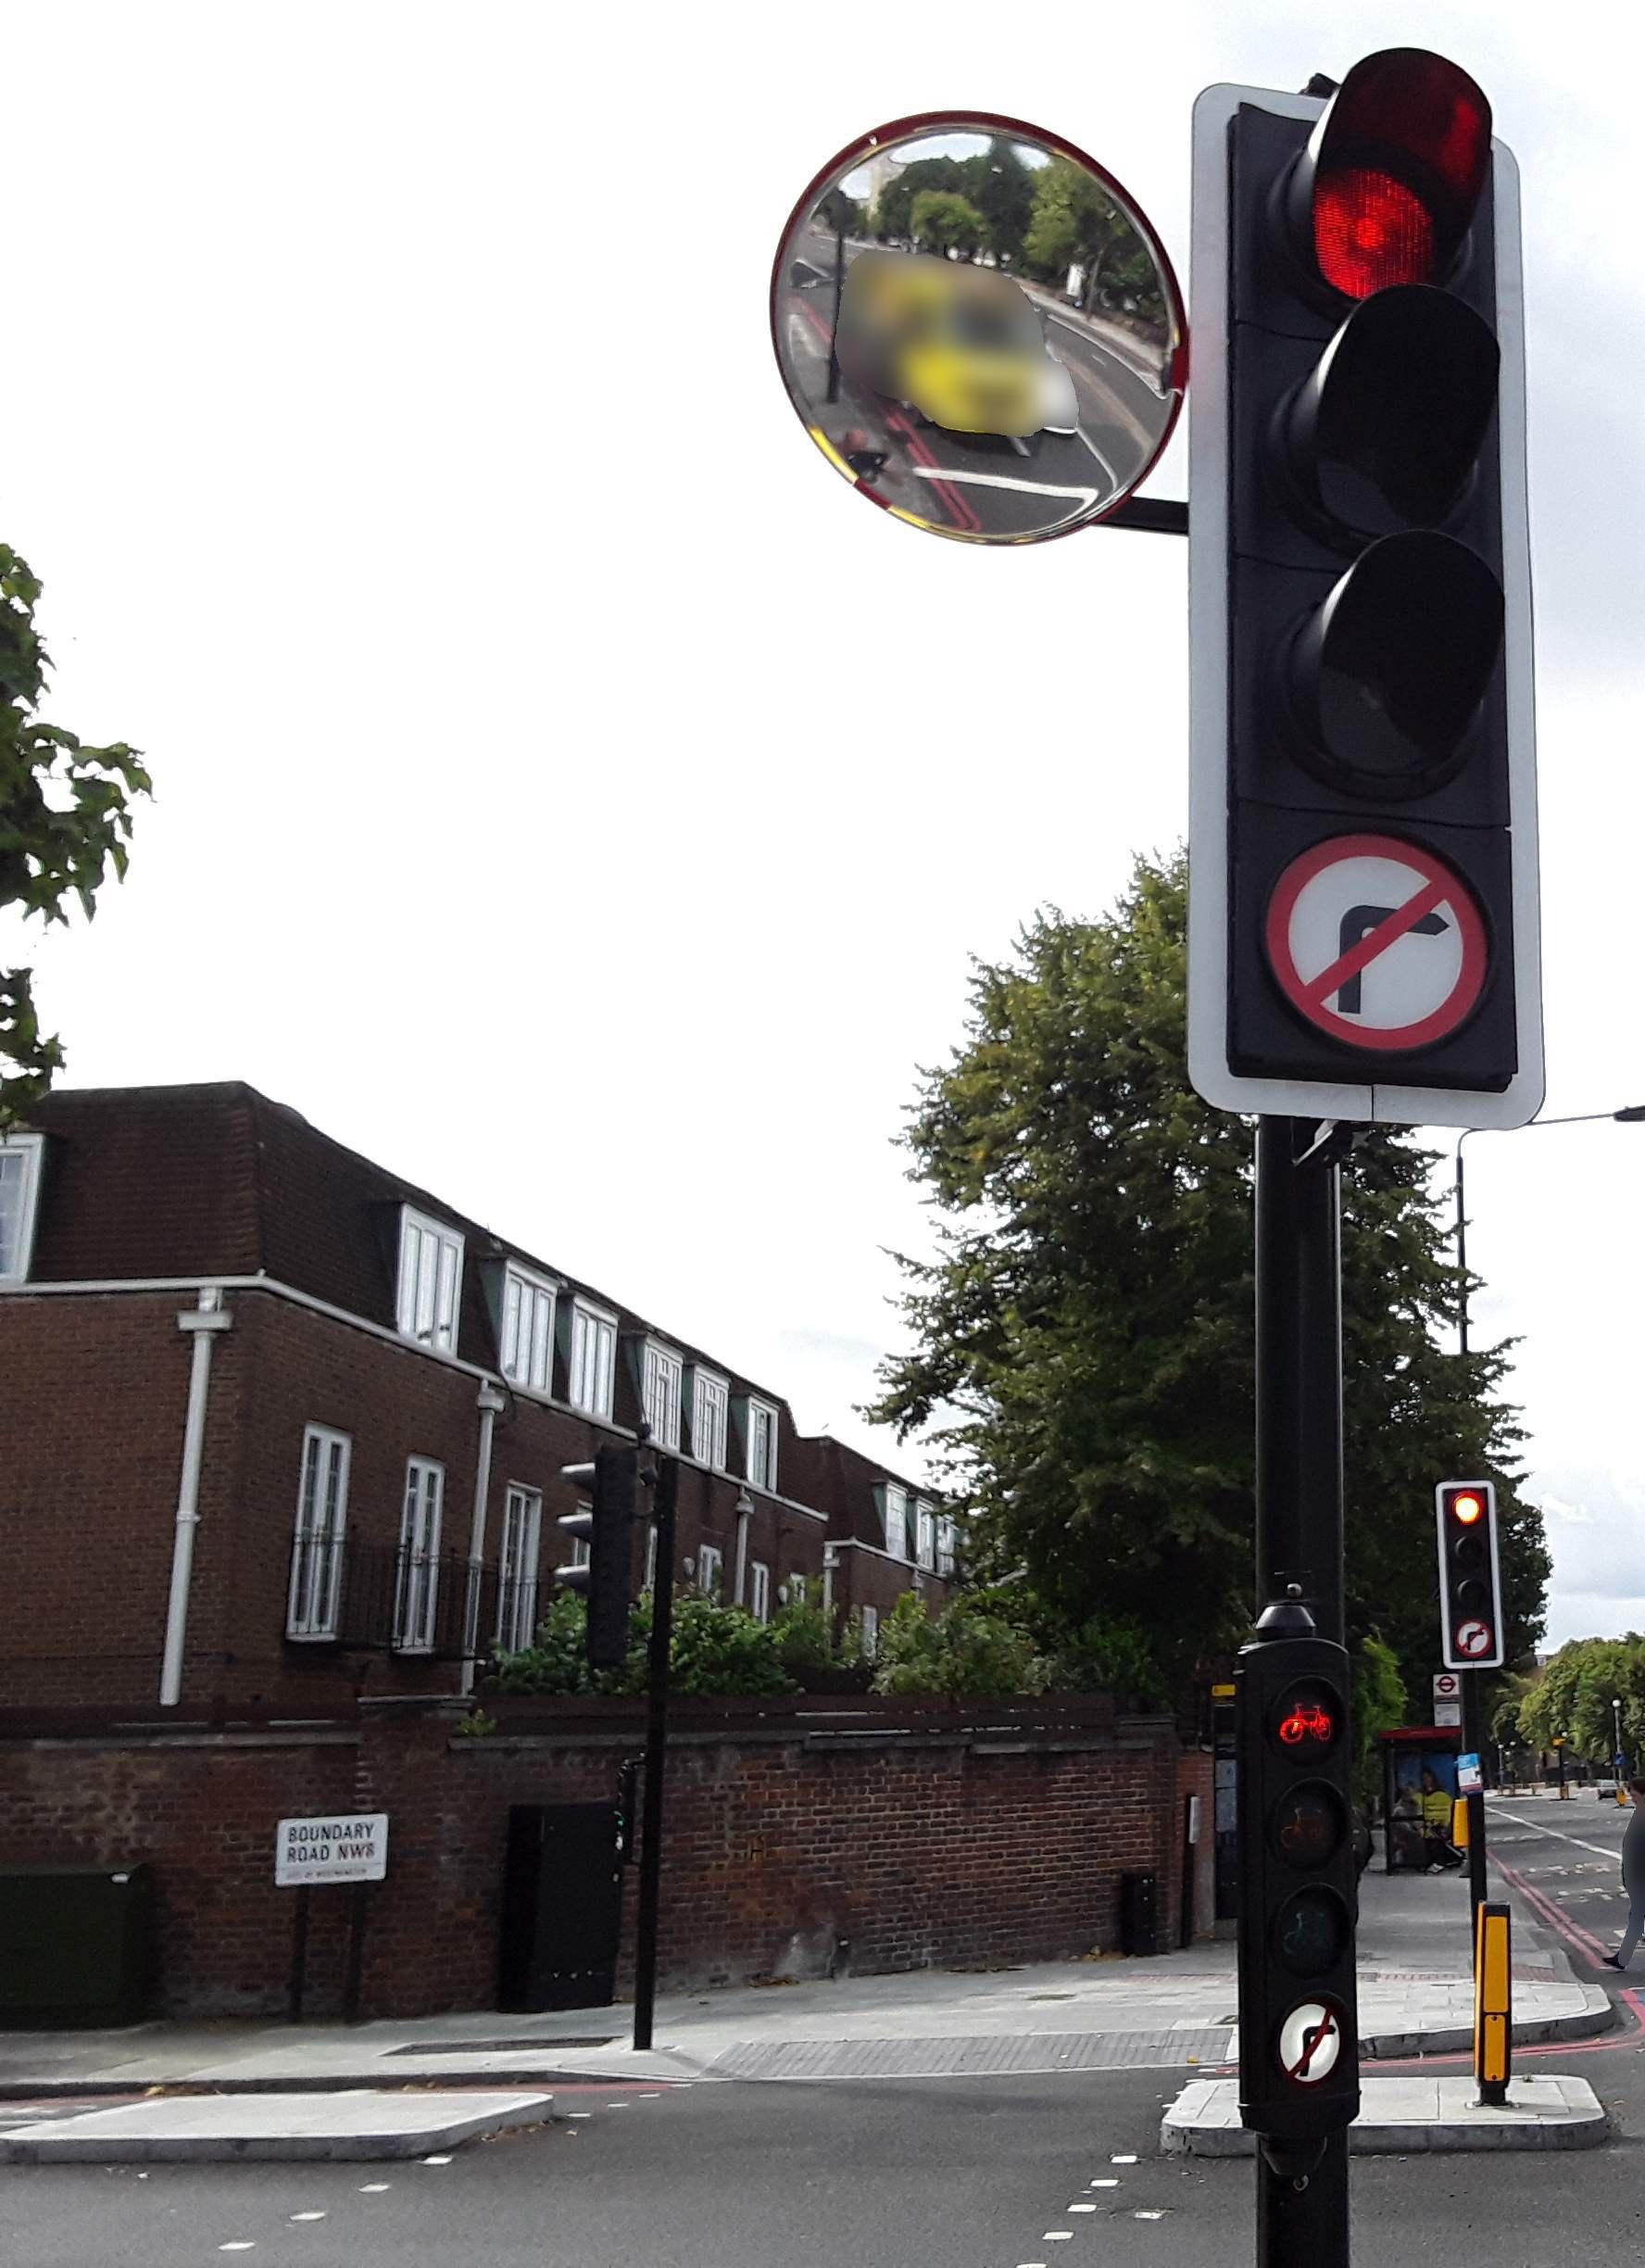

In [54]:
import IPython.display as Disp
url_photo = df_signals.loc[(0,'properties')].PHOTO1_URL
Disp.Image(requests.get(url_photo).content)

### Visualise the borough wise count 

Text(0.5, 1.0, 'Count of Cycle related Signals per Borough')

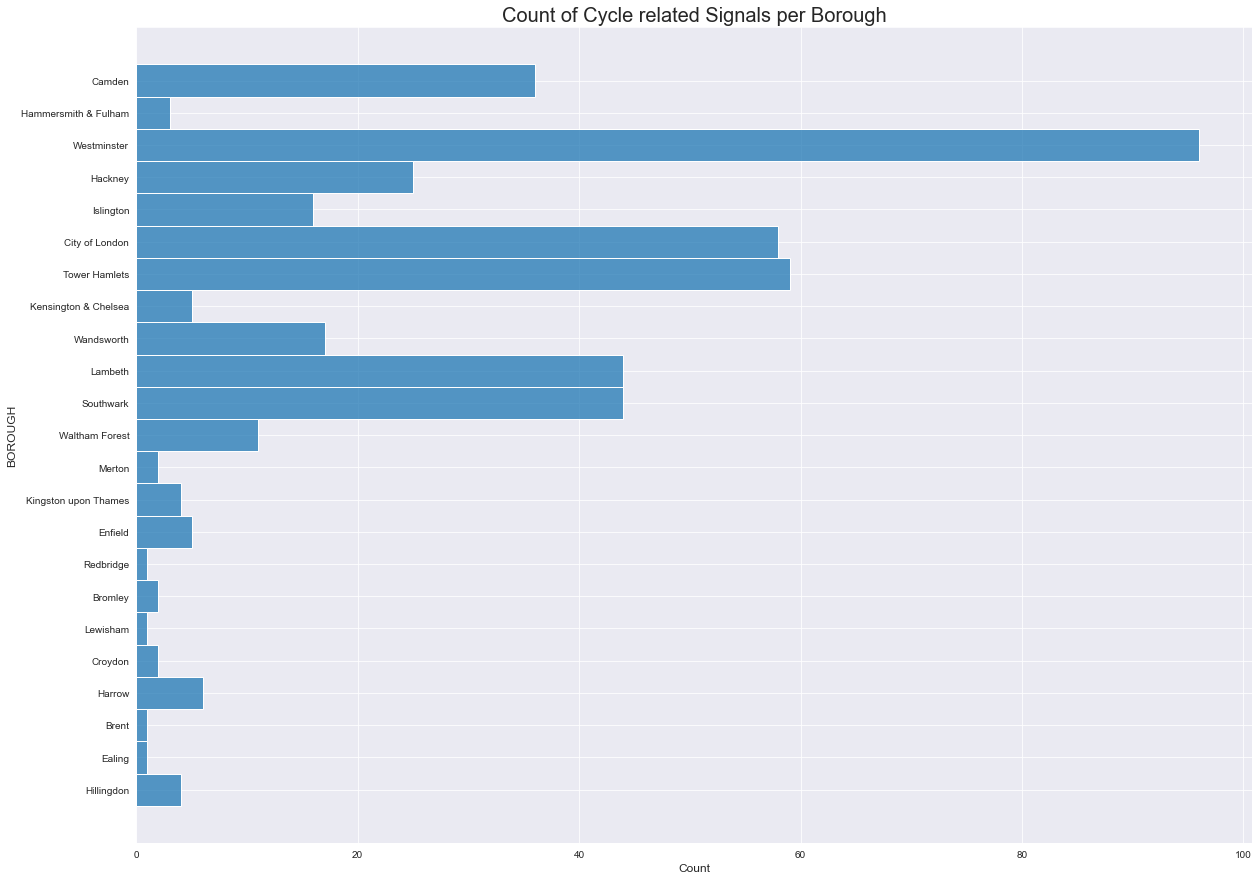

In [55]:
df_signals_borough = df_signals.loc(axis=0)[:,('properties')].BOROUGH.value_counts() 
fig,ax = plt.subplots()
sns.histplot(df_signals.loc(axis=0)[:,('properties')],y='BOROUGH')
ax.set_title('Count of Cycle related Signals per Borough', fontsize=20)

In [56]:
# convert the value counts borough wise to a df
df_signals_borough=pd.DataFrame(df_signals_borough)
df_signals_borough=df_signals_borough.reset_index()
df_signals_borough=df_signals_borough.rename(columns={'index':'Borough','BOROUGH':'signals_count'})


In [57]:
# view the df
df_signals_borough

Borough  signals_count
0            Westminster             96
1          Tower Hamlets             59
2         City of London             58
3                Lambeth             44
4              Southwark             44
5                 Camden             36
6                Hackney             25
7             Wandsworth             17
8              Islington             16
9         Waltham Forest             11
10                Harrow              6
11  Kensington & Chelsea              5
12               Enfield              5
13  Kingston upon Thames              4
14            Hillingdon              4
15  Hammersmith & Fulham              3
16                Merton              2
17               Bromley              2
18               Croydon              2
19             Redbridge              1
20              Lewisham              1
21                 Brent              1
22                Ealing              1

In [58]:
merged = merged.join(df_signals_borough.set_index('Borough'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
NAME                                                                         
Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
Croydon               E09000008   8649.441       0.000         F       NaN   
Bromley               E09000006  15013.487       0.000         F       NaN   
Hounslow              E09000018   5658.541      60.755         F       NaN   
Ealing                E09000009   5554.428       0.000         F       NaN   

                      SUB_2006  \
NAME                             
Kingston upon Thames       NaN   
Croydon                    NaN   
Bromley                    NaN   
Hounslow                   NaN   
Ealing                     NaN   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      signage_count  tr_calm_count  signals_count  
NAME                                                               
Kingston upon Thames         3095.0         1300.0            4.0  
Croydon                      5581.0         2167.0            2.0  
Bromley                      2752.0          795.0            2.0  
Hounslow                     3521.0         1365.0            NaN  
Ealing                       4516.0         2879.0            1.0

In [59]:
merged.signals_count.fillna(0)

NAME
Kingston upon Thames       4.0
Croydon                    2.0
Bromley                    2.0
Hounslow                   0.0
Ealing                     1.0
Havering                   0.0
Hillingdon                 4.0
Harrow                     6.0
Brent                      1.0
Barnet                     0.0
Lambeth                   44.0
Southwark                 44.0
Lewisham                   1.0
Greenwich                  0.0
Bexley                     0.0
Enfield                    5.0
Waltham Forest            11.0
Redbridge                  1.0
Sutton                     0.0
Richmond upon Thames       0.0
Merton                     2.0
Wandsworth                17.0
Hammersmith and Fulham     0.0
Kensington and Chelsea     0.0
Westminster               96.0
Camden                    36.0
Tower Hamlets             59.0
Islington                 16.0
Hackney                   25.0
Haringey                   0.0
Newham                     0.0
Barking and Dagenham       0.0
Cit

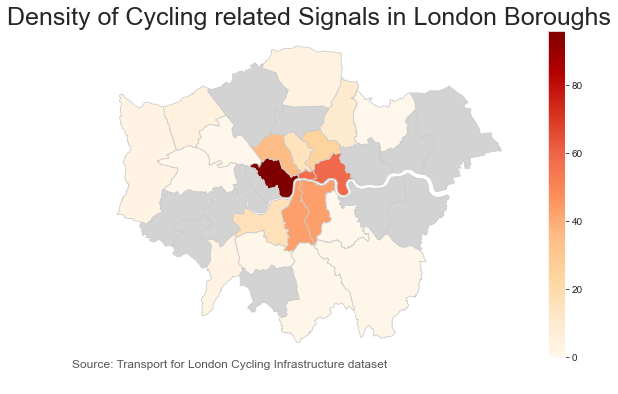

In [60]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'signals_count'
# set the range for the choropleth
vmin, vmax = df_signals_borough.signals_count.max(), 0
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds = {"color":"lightgrey"})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Density of Cycling related Signals in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

### 4. Cycle Parking 
Cycle parking assets such as cycle stands or racks to which cycles can be locked. In some locations cycle parking consists of lockers or a secure compound.

Cycle Parking dataset is present as json file in the https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/ folder. We retrieve the file using requests package and then read the json in to a dataframe.

We retrieve the file and save it into the London folder on the local machine.

In [61]:
import pandas as pd
import requests

# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/cycle_parking.json"

# Retrieve the JSON data from the URL
response = requests.get(url)
data = response.json()

# Save the JSON data as a local file
filename = "../London/cycle_parking.json"

with open(filename, "w") as file:
    file.write(response.text)

# Load the JSON data into a DataFrame
df = pd.read_json(filename)

# Display the DataFrame
df


type           name  \
0      FeatureCollection  cycle_parking   
1      FeatureCollection  cycle_parking   
2      FeatureCollection  cycle_parking   
3      FeatureCollection  cycle_parking   
4      FeatureCollection  cycle_parking   
...                  ...            ...   
23753  FeatureCollection  cycle_parking   
23754  FeatureCollection  cycle_parking   
23755  FeatureCollection  cycle_parking   
23756  FeatureCollection  cycle_parking   
23757  FeatureCollection  cycle_parking   

                                                features  
0      {'type': 'Feature', 'geometry': {'type': 'Poin...  
1      {'type': 'Feature', 'geometry': {'type': 'Poin...  
2      {'type': 'Feature', 'geometry': {'type': 'Poin...  
3      {'type': 'Feature', 'geometry': {'type': 'Poin...  
4      {'type': 'Feature', 'geometry': {'type': 'Poin...  
...                                                  ...  
23753  {'type': 'Feature', 'geometry': {'type': 'Poin...  
23754  {'type': 'Feature', 'geometry': {'type': 'Poin...  
23755  {'type': 'Feature', 'geometry': {'type': 'Poin...  
23756  {'type': 'Feature', 'geometry': {'type': 'Poin...  
23757  {'type': 'Feature', 'geometry': {'type': 'Poin...  

[23758 rows x 3 columns]

In [62]:
# extract the features
cycle_park = df.features.to_dict()

In [63]:
#convert to df
df_cycle_parking = pd.concat({k: pd.DataFrame(v).T for k, v in cycle_park.items()}, axis=0)

In [64]:
# view the df
df_cycle_parking

type                            coordinates FEATURE_ID  \
0     type        Feature                                Feature    Feature   
      geometry      Point         [-0.2427797672, 51.5103212773]        NaN   
      properties      NaN                                    NaN  RWG014703   
1     type        Feature                                Feature    Feature   
      geometry      Point         [-0.2427846609, 51.5102610544]        NaN   
...                   ...                                    ...        ...   
23756 geometry      Point  [-0.41155165450000003, 51.5724385619]        NaN   
      properties      NaN                                    NaN  RWG238366   
23757 type        Feature                                Feature    Feature   
      geometry      Point          [-0.4154625595, 51.608777472]        NaN   
      properties      NaN                                    NaN  RWG238427   

                      SVDATE PRK_CARR PRK_COVER PRK_SECURE PRK_LOCKER  \
0     type           Feature  Feature   Feature    Feature    Feature   
      geometry           NaN      NaN       NaN        NaN        NaN   
      properties  2017-09-07    FALSE     FALSE      FALSE      FALSE   
1     type           Feature  Feature   Feature    Feature    Feature   
      geometry           NaN      NaN       NaN        NaN        NaN   
...                      ...      ...       ...        ...        ...   
23756 geometry           NaN      NaN       NaN        NaN        NaN   
      properties  2018-01-23    FALSE     FALSE      FALSE      FALSE   
23757 type           Feature  Feature   Feature    Feature    Feature   
      geometry           NaN      NaN       NaN        NaN        NaN   
      properties  2018-01-25    FALSE     FALSE      FALSE      FALSE   

                 PRK_SHEFF PRK_MSTAND  ... PRK_BUTERF PRK_WHEEL PRK_HANGAR  \
0     type         Feature    Feature  ...    Feature   Feature    Feature   
      geometry         NaN        NaN  ...        NaN       NaN        NaN   
      properties     FALSE      FALSE  ...      FALSE     FALSE       TRUE   
1     type         Feature    Feature  ...    Feature   Feature    Feature   
      geometry         NaN        NaN  ...        NaN       NaN        NaN   
...                    ...        ...  ...        ...       ...        ...   
23756 geometry         NaN        NaN  ...        NaN       NaN        NaN   
      properties      TRUE      FALSE  ...      FALSE     FALSE      FALSE   
23757 type         Feature    Feature  ...    Feature   Feature    Feature   
      geometry         NaN        NaN  ...        NaN       NaN        NaN   
      properties      TRUE      FALSE  ...      FALSE     FALSE      FALSE   

                 PRK_TIER PRK_OTHER PRK_PROVIS  PRK_CPT               BOROUGH  \
0     type        Feature   Feature    Feature  Feature               Feature   
      geometry        NaN       NaN        NaN      NaN                   NaN   
      properties    FALSE     FALSE          1        6  Hammersmith & Fulham   
1     type        Feature   Feature    Feature  Feature               Feature   
      geometry        NaN       NaN        NaN      NaN                   NaN   
...                   ...       ...        ...      ...                   ...   
23756 geometry        NaN       NaN        NaN      NaN                   NaN   
      properties    FALSE     FALSE          2        4            Hillingdon   
23757 type        Feature   Feature    Feature  Feature               Feature   
      geometry        NaN       NaN        NaN      NaN                   NaN   
      properties    FALSE     FALSE          1        2            Hillingdon   

                                                         PHOTO1_URL  \
0     type                                                  Feature   
      geometry                                                  NaN   
      properties  https://cycleassetimages.data.tfl.gov.uk/RWG01...   
1

View a sample traffic calming measure to understand the data
We can access the coordinates and a sample photograph of an asset using the url in the df


In [65]:

# view the coordinates of the first element
df_cycle_parking.loc[(1,'geometry')].coordinates



[-0.2427846609, 51.5102610544]

In [66]:
# view the sample photo of the first element
df_cycle_parking.loc[(1,'properties')].PHOTO1_URL



'https://cycleassetimages.data.tfl.gov.uk/RWG014704_1.jpg'

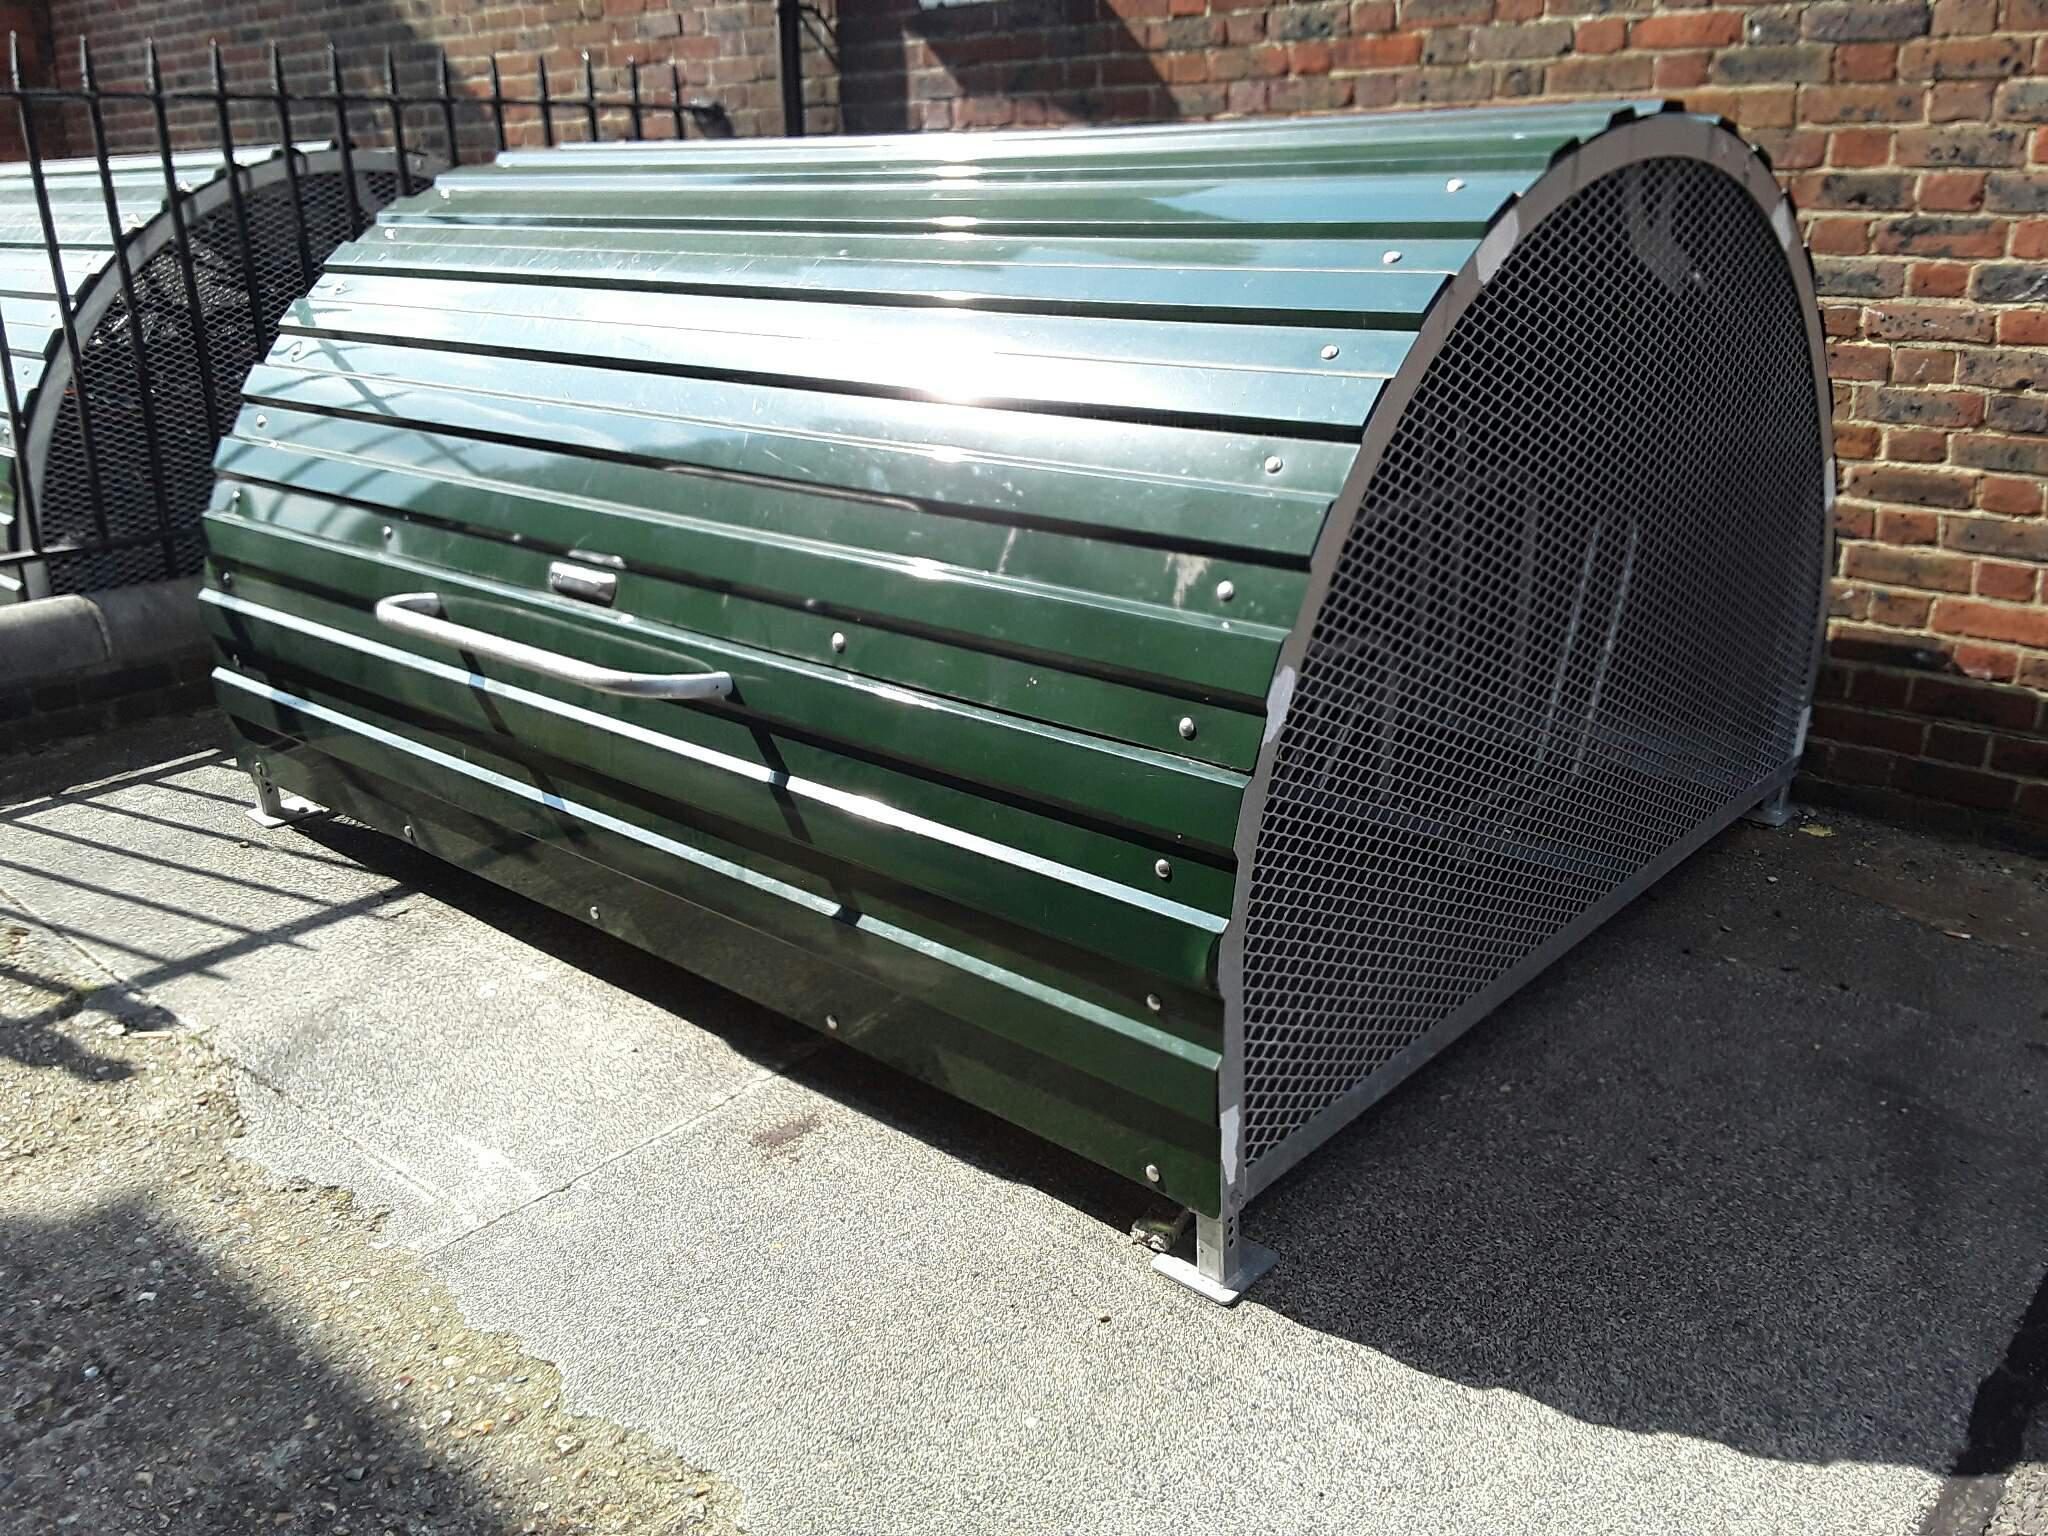

In [67]:

import IPython.display as Disp
url_photo = df_cycle_parking.loc[(1,'properties')].PHOTO1_URL
Disp.Image(requests.get(url_photo).content)

### Visualise the borough wise count of cycle parking

Text(0.5, 1.0, 'Cycle Parking Borough Wise')

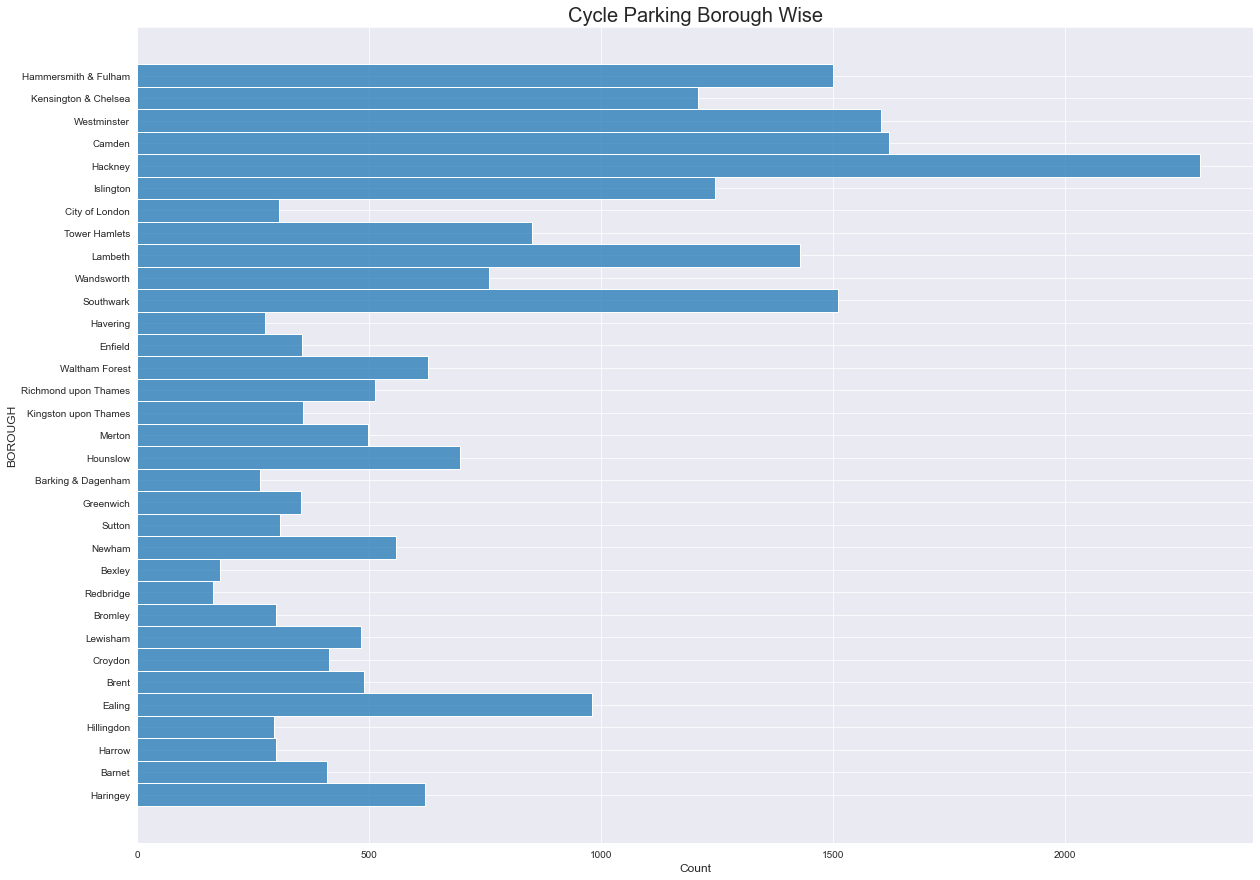

In [68]:
df_cycle_parking_borough = df_cycle_parking.loc(axis=0)[:,('properties')].BOROUGH.value_counts() 
fig,ax = plt.subplots()
sns.histplot(df_cycle_parking.loc(axis=0)[:,('properties')],y='BOROUGH')
ax.set_title('Cycle Parking Borough Wise', fontsize=20)

In [69]:
# convert the value counts borough wise to a df
df_cycle_parking_borough=pd.DataFrame(df_cycle_parking_borough)
df_cycle_parking_borough=df_cycle_parking_borough.reset_index()
df_cycle_parking_borough=df_cycle_parking_borough.rename(columns={'index':'Borough','BOROUGH':'cycle_park_count'})


In [70]:
# view the borough counts
df_cycle_parking_borough

Borough  cycle_park_count
0                Hackney              2292
1                 Camden              1622
2            Westminster              1603
3              Southwark              1511
4   Hammersmith & Fulham              1500
5                Lambeth              1429
6              Islington              1246
7   Kensington & Chelsea              1209
8                 Ealing               980
9          Tower Hamlets               851
10            Wandsworth               759
11              Hounslow               695
12        Waltham Forest               627
13              Haringey               620
14                Newham               557
15  Richmond upon Thames               512
16                Merton               498
17                 Brent               489
18              Lewisham               483
19               Croydon               414
20                Barnet               410
21  Kingston upon Thames               357
22               Enfield               355
23             Greenwich               353
24                Sutton               307
25        City of London               306
26               Bromley               299
27                Harrow               298
28            Hillingdon               294
29              Havering               275
30    Barking & Dagenham               265
31                Bexley               179
32             Redbridge               163

In [71]:
merged = merged.join(df_cycle_parking_borough.set_index('Borough'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
NAME                                                                         
Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
Croydon               E09000008   8649.441       0.000         F       NaN   
Bromley               E09000006  15013.487       0.000         F       NaN   
Hounslow              E09000018   5658.541      60.755         F       NaN   
Ealing                E09000009   5554.428       0.000         F       NaN   

                      SUB_2006  \
NAME                             
Kingston upon Thames       NaN   
Croydon                    NaN   
Bromley                    NaN   
Hounslow                   NaN   
Ealing                     NaN   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      signage_count  tr_calm_count  signals_count  \
NAME                                                                
Kingston upon Thames         3095.0         1300.0            4.0   
Croydon                      5581.0         2167.0            2.0   
Bromley                      2752.0          795.0            2.0   
Hounslow                     3521.0         1365.0            NaN   
Ealing                       4516.0         2879.0            1.0   

                      cycle_park_count  
NAME                                    
Kingston upon Thames             357.0  
Croydon                          414.0  
Bromley                          299.0  
Hounslow                         695.0  
Ealing                           980.0

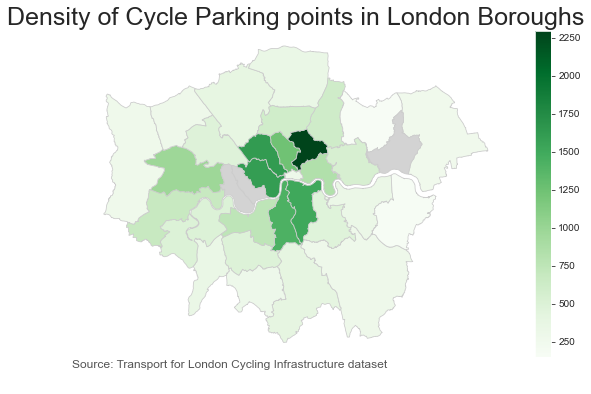

In [72]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'cycle_park_count'
# set the range for the choropleth
vmin, vmax = df_cycle_parking_borough.cycle_park_count.max(), df_cycle_parking_borough.cycle_park_count.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds = {"color":"lightgrey"})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Density of Cycle Parking points in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

### 5. Cycle Lane/Cycle Track
Formally designated road space for cyclists, usually identified with a combination of signs and line markings, and very often marked with the cycle symbol. Cycle lanes are parts of the road marked for use by cyclists. A bus lane that cyclists may use is regarded as a type of cycle lane. Cycle tracks are always off-carriageway, either next to it (associated with the footway) or completely away from the highway (e.g. canal towpaths, routes through parks). The ways that they are signed are more variable than cycle lanes.

The dataset is present as json file in the https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/ folder. 
We retrieve the file and save it into the London folder on the local machine.

In [73]:
import pandas as pd
import requests

# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/lines/cycle_lane_track.json"

# Retrieve the JSON data from the URL
response = requests.get(url)
data = response.json()

# Save the JSON data as a local file
filename = "../London/cycle_lane_track.json"

with open(filename, "w") as file:
    file.write(response.text)

# Load the JSON data into a DataFrame
df = pd.read_json(filename)

# Display the DataFrame
df

type              name  \
0      FeatureCollection  cycle_lane_track   
1      FeatureCollection  cycle_lane_track   
2      FeatureCollection  cycle_lane_track   
3      FeatureCollection  cycle_lane_track   
4      FeatureCollection  cycle_lane_track   
...                  ...               ...   
24971  FeatureCollection  cycle_lane_track   
24972  FeatureCollection  cycle_lane_track   
24973  FeatureCollection  cycle_lane_track   
24974  FeatureCollection  cycle_lane_track   
24975  FeatureCollection  cycle_lane_track   

                                                features  
0      {'type': 'Feature', 'geometry': {'type': 'Line...  
1      {'type': 'Feature', 'geometry': {'type': 'Line...  
2      {'type': 'Feature', 'geometry': {'type': 'Line...  
3      {'type': 'Feature', 'geometry': {'type': 'Line...  
4      {'type': 'Feature', 'geometry': {'type': 'Line...  
...                                                  ...  
24971  {'type': 'Feature', 'geometry': {'type': 'Mult...  
24972  {'type': 'Feature', 'geometry': {'type': 'Line...  
24973  {'type': 'Feature', 'geometry': {'type': 'Mult...  
24974  {'type': 'Feature', 'geometry': {'type': 'Line...  
24975  {'type': 'Feature', 'geometry': {'type': 'Line...  

[24976 rows x 3 columns]

In [74]:
# extract the features
cycle_track = df.features.to_dict()

In [75]:
#convert to df
df_cycle_track = pd.concat({k: pd.DataFrame(v).T for k, v in cycle_track.items()}, axis=0)

In [76]:
# view the df
df_cycle_track

type  \
0     type           Feature   
      geometry    LineString   
      properties         NaN   
1     type           Feature   
      geometry    LineString   
...                      ...   
24974 geometry    LineString   
      properties         NaN   
24975 type           Feature   
      geometry    LineString   
      properties         NaN   

                                                        coordinates  \
0     type                                                  Feature   
      geometry    [[0.13534200940000002, 51.5716371185], [0.1334...   
      properties                                                NaN   
1     type                                                  Feature   
      geometry    [[0.1318879179, 51.5710220886], [0.1312756444,...   
...                                                             ...   
24974 geometry    [[-0.0459903757, 51.5621574233], [-0.045529359...   
      properties                                                NaN   
24975 type                                                  Feature   
      geometry    [[-0.0569420941, 51.5711427224], [-0.056475943...   
      properties                                                NaN   

                 FEATURE_ID      SVDATE CLT_CARR CLT_SEGREG CLT_STEPP  \
0     type          Feature     Feature  Feature    Feature   Feature   
      geometry          NaN         NaN      NaN        NaN       NaN   
      properties  RWG154837  2017-10-14     TRUE      FALSE     FALSE   
1     type          Feature     Feature  Feature    Feature   Feature   
      geometry          NaN         NaN      NaN        NaN       NaN   
...                     ...         ...      ...        ...       ...   
24974 geometry          NaN         NaN      NaN        NaN       NaN   
      properties  RWG276415  2018-03-13    FALSE      FALSE     FALSE   
24975 type          Feature     Feature  Feature    Feature   Feature   
      geometry          NaN         NaN      NaN        NaN       NaN   
      properties  RWG150303  2017-10-04    FALSE      FALSE     FALSE   

                 CLT_PARSEG CLT_SHARED CLT_MANDAT  ... CLT_CBYPAS CLT_BBYPAS  \
0     type          Feature    Feature    Feature  ...    Feature    Feature   
      geometry          NaN        NaN        NaN  ...        NaN        NaN   
      properties      FALSE      FALSE      FALSE  ...      FALSE      FALSE   
1     type          Feature    Feature    Feature  ...    Feature    Feature   
      geometry          NaN        NaN        NaN  ...        NaN        NaN   
...                     ...        ...        ...  ...        ...        ...   
24974 geometry          NaN        NaN        NaN  ...        NaN        NaN   
      properties      FALSE       TRUE      FALSE  ...      FALSE      FALSE   
24975 type          Feature    Feature    Feature  ...    Feature    Feature   
      geometry          NaN        NaN        NaN  ...        NaN        NaN   
      properties      FALSE       TRUE      FALSE  ...      FALSE      FALSE   

                 CLT_PARKR CLT_WATERR CLT_PTIME CLT_ACCESS CLT_COLOUR  \
0     type         Feature    Feature   Feature    Feature    Feature   
      geometry         NaN        NaN       NaN        NaN        NaN   
      properties     FALSE      FALSE     FALSE       None       NONE   
1     type         Feature    Feature   Feature    Feature    Feature   
      geometry         NaN        NaN       NaN        NaN        NaN   
...                    ...        ...       ...        ...        ...   
24974 geometry         NaN        NaN       NaN        NaN        NaN   
      properties     FALSE      FALSE     FALSE       None      GREEN   
24975 type         Feature    Feature   Feature    Feature    Feature   
      geometry         NaN        NaN       NaN        NaN        NaN   
      properties      TRUE       TRUE     FALSE       None       NONE   

                             BOROUGH  \
0     type                   Fe

View a sample traffic calming measure to understand the data
We can access the coordinates and a sample photograph of an asset using the url in the df


In [77]:

# view the coordinates of the first element
df_cycle_track.loc[(0,'geometry')].coordinates


[[0.13534200940000002, 51.5716371185], [0.1334807414, 51.5713042499]]

In [78]:
# view the sample photo of the first element
df_cycle_track.loc[(0,'properties')].PHOTO1_URL



'https://cycleassetimages.data.tfl.gov.uk/RWG154837_1.jpg'

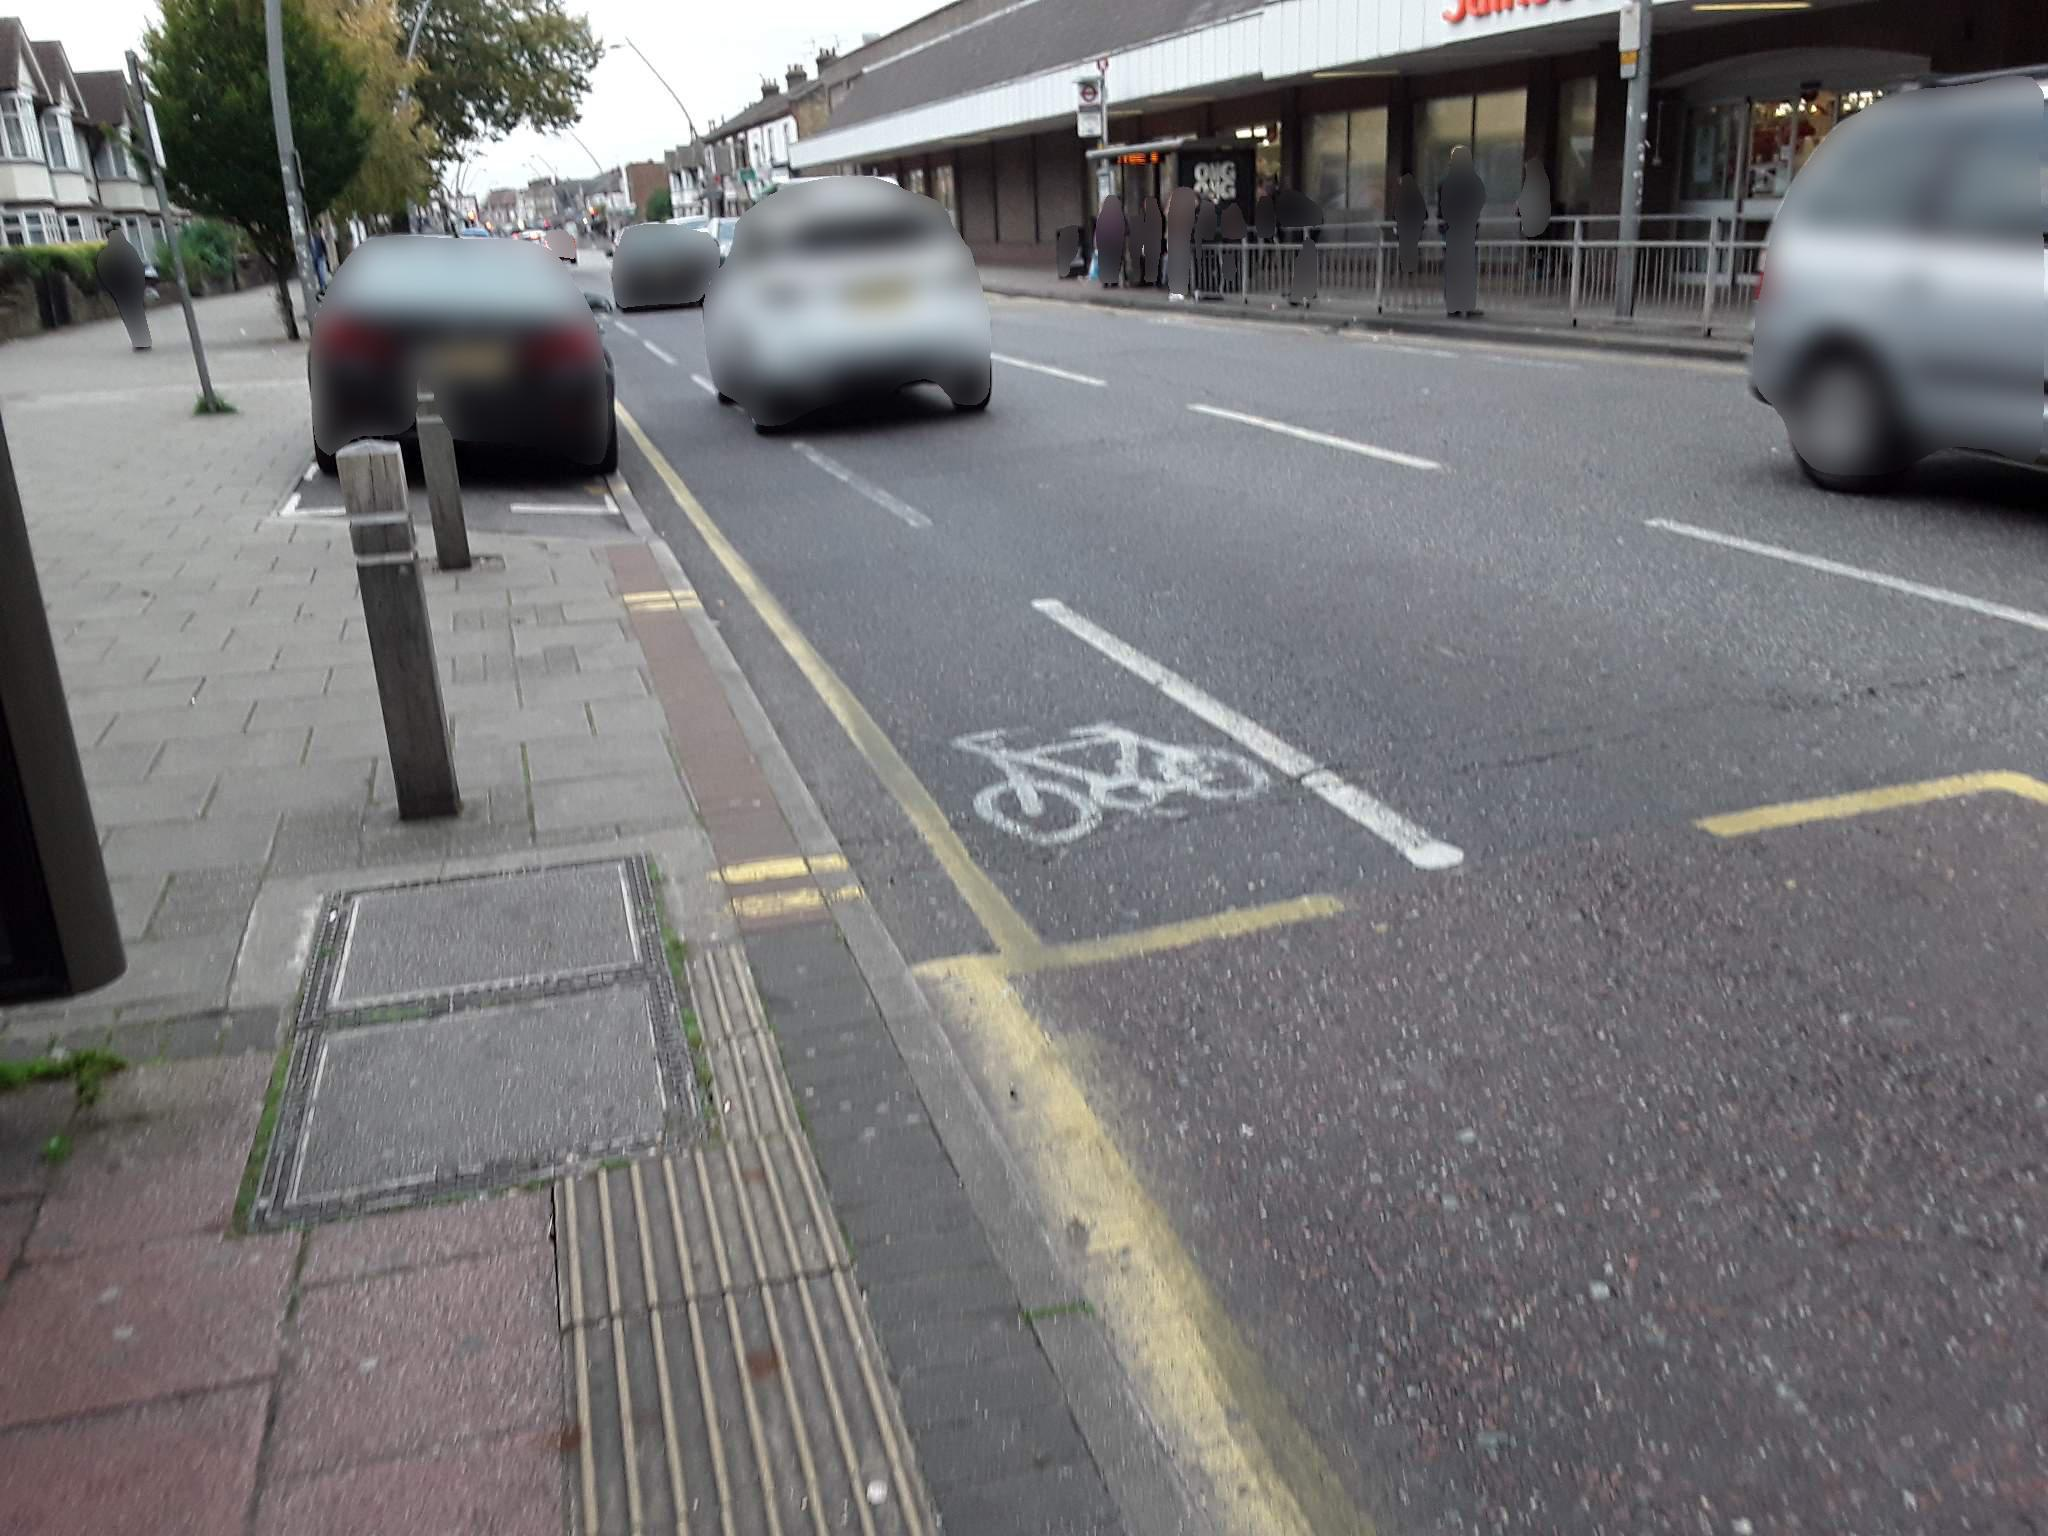

In [79]:

import IPython.display as Disp
url_photo = df_cycle_track.loc[(0,'properties')].PHOTO1_URL
Disp.Image(requests.get(url_photo).content)

### Visualise the borough wise count of cycle track lanes

Text(0.5, 1.0, 'Cycle Track Lanes Borough Wise')

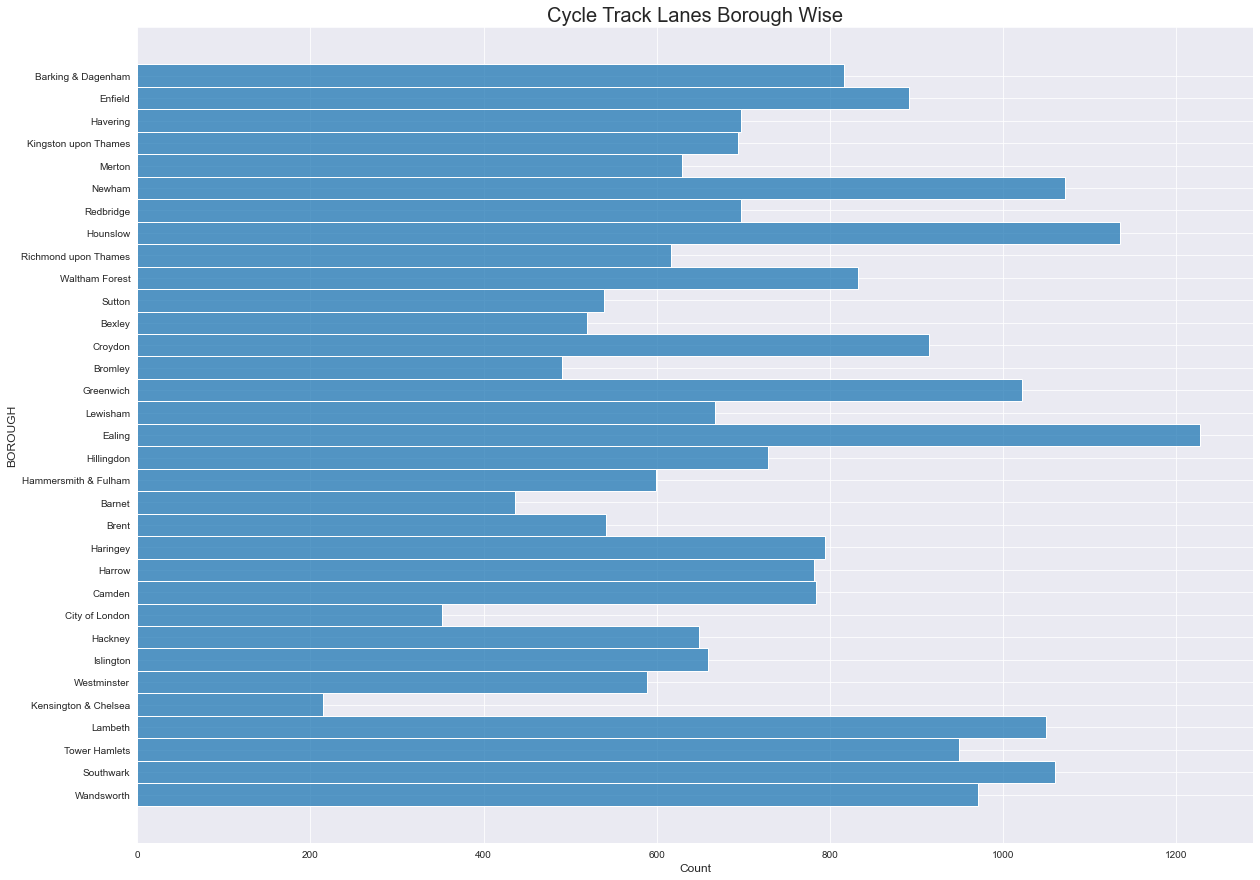

In [80]:

df_cycle_track_borough = df_cycle_track.loc(axis=0)[:,('properties')].BOROUGH.value_counts() 
fig,ax = plt.subplots()
sns.histplot(df_cycle_track.loc(axis=0)[:,('properties')],y='BOROUGH')
ax.set_title('Cycle Track Lanes Borough Wise', fontsize=20)

In [81]:
# convert the value counts borough wise to a df
df_cycle_track_borough=pd.DataFrame(df_cycle_track_borough)
df_cycle_track_borough=df_cycle_track_borough.reset_index()
df_cycle_track_borough=df_cycle_track_borough.rename(columns={'index':'Borough','BOROUGH':'cycle_tracks_count'})


In [82]:
# view the borough counts
df_cycle_track_borough

Borough  cycle_tracks_count
0                 Ealing                1228
1               Hounslow                1135
2                 Newham                1072
3              Southwark                1060
4                Lambeth                1050
5              Greenwich                1022
6             Wandsworth                 971
7          Tower Hamlets                 949
8                Croydon                 915
9                Enfield                 892
10        Waltham Forest                 833
11    Barking & Dagenham                 817
12              Haringey                 794
13                Camden                 784
14                Harrow                 782
15            Hillingdon                 729
16              Havering                 697
17             Redbridge                 697
18  Kingston upon Thames                 694
19              Lewisham                 667
20             Islington                 659
21               Hackney                 649
22                Merton                 629
23  Richmond upon Thames                 617
24  Hammersmith & Fulham                 599
25           Westminster                 589
26                 Brent                 541
27                Sutton                 539
28                Bexley                 519
29               Bromley                 491
30                Barnet                 436
31        City of London                 352
32  Kensington & Chelsea                 214

In [83]:
merged = merged.join(df_cycle_track_borough.set_index('Borough'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
NAME                                                                         
Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
Croydon               E09000008   8649.441       0.000         F       NaN   
Bromley               E09000006  15013.487       0.000         F       NaN   
Hounslow              E09000018   5658.541      60.755         F       NaN   
Ealing                E09000009   5554.428       0.000         F       NaN   

                      SUB_2006  \
NAME                             
Kingston upon Thames       NaN   
Croydon                    NaN   
Bromley                    NaN   
Hounslow                   NaN   
Ealing                     NaN   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      signage_count  tr_calm_count  signals_count  \
NAME                                                                
Kingston upon Thames         3095.0         1300.0            4.0   
Croydon                      5581.0         2167.0            2.0   
Bromley                      2752.0          795.0            2.0   
Hounslow                     3521.0         1365.0            NaN   
Ealing                       4516.0         2879.0            1.0   

                      cycle_park_count  cycle_tracks_count  
NAME                                                        
Kingston upon Thames             357.0               694.0  
Croydon                          414.0               915.0  
Bromley                          299.0               491.0  
Hounslow                         695.0              1135.0  
Ealing                           980.0              1228.0

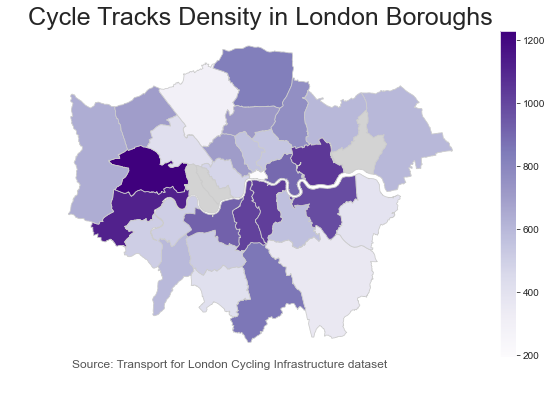

In [84]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'cycle_tracks_count'
# set the range for the choropleth
vmin, vmax = df_cycle_track_borough.cycle_tracks_count.max(), df_cycle_track_borough.cycle_tracks_count.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds = {"color":"lightgrey"})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Cycle Tracks Density in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

### 6. Importing Advanced Stop Lines Dataset
Advance stop lines (ASL) located at traffic signals to provide an area for cyclists to wait for the traffic signals to change ahead of general traffic. The ASL reservoir is the area between the solid stop line, level with the signals, and the ASL for general traffic. The reservoir may have a coloured surface and have a cycle symbol in the centre.

The dataset is present as json file in the https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/points/ folder. We retrieve the file using requests package and then read the json in to a dataframe.

We retrieve the file and save it into the London folder on the local machine.



In [85]:
import pandas as pd
import requests

# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/lines/advanced_stop_line.json"

# Retrieve the JSON data from the URL
response = requests.get(url)
data = response.json()

# Save the JSON data as a local file
filename = "../London/advanced_stop_line.json"

with open(filename, "w") as file:
    file.write(response.text)

# Load the JSON data into a DataFrame
df = pd.read_json(filename)

# Display the DataFrame
df

type                name  \
0     FeatureCollection  advanced_stop_line   
1     FeatureCollection  advanced_stop_line   
2     FeatureCollection  advanced_stop_line   
3     FeatureCollection  advanced_stop_line   
4     FeatureCollection  advanced_stop_line   
...                 ...                 ...   
3770  FeatureCollection  advanced_stop_line   
3771  FeatureCollection  advanced_stop_line   
3772  FeatureCollection  advanced_stop_line   
3773  FeatureCollection  advanced_stop_line   
3774  FeatureCollection  advanced_stop_line   

                                               features  
0     {'type': 'Feature', 'geometry': {'type': 'Line...  
1     {'type': 'Feature', 'geometry': {'type': 'Line...  
2     {'type': 'Feature', 'geometry': {'type': 'Line...  
3     {'type': 'Feature', 'geometry': {'type': 'Line...  
4     {'type': 'Feature', 'geometry': {'type': 'Line...  
...                                                 ...  
3770  {'type': 'Feature', 'geometry': {'type': 'Line...  
3771  {'type': 'Feature', 'geometry': {'type': 'Line...  
3772  {'type': 'Feature', 'geometry': {'type': 'Line...  
3773  {'type': 'Feature', 'geometry': {'type': 'Line...  
3774  {'type': 'Feature', 'geometry': {'type': 'Line...  

[3775 rows x 3 columns]

In [86]:
# extract the features
adv_stop_line = df.features.to_dict()

In [87]:
#convert to df
df_asl = pd.concat({k: pd.DataFrame(v).T for k, v in adv_stop_line.items()}, axis=0)

In [88]:
# view the df
df_asl

type  \
0    type           Feature   
     geometry    LineString   
     properties         NaN   
1    type           Feature   
     geometry    LineString   
...                     ...   
3773 geometry    LineString   
     properties         NaN   
3774 type           Feature   
     geometry    LineString   
     properties         NaN   

                                                       coordinates FEATURE_ID  \
0    type                                                  Feature    Feature   
     geometry    [[-0.1092281318, 51.6179137048], [-0.109170785...        NaN   
     properties                                                NaN  RWG276569   
1    type                                                  Feature    Feature   
     geometry    [[-0.10989671520000001, 51.6157537853], [-0.10...        NaN   
...                                                            ...        ...   
3773 geometry    [[-0.130396546, 51.4247639522], [-0.1303720856...        NaN   
     properties                                                NaN  RWG102039   
3774 type                                                  Feature    Feature   
     geometry    [[-0.1246183647, 51.4156206472], [-0.124578542...        NaN   
     properties                                                NaN  RWG102041   

                     SVDATE  ASL_FDR ASL_FDRLFT ASL_FDCENT ASL_FDRIGH  \
0    type           Feature  Feature    Feature    Feature    Feature   
     geometry           NaN      NaN        NaN        NaN        NaN   
     properties  2018-03-07    FALSE      FALSE      FALSE      FALSE   
1    type           Feature  Feature    Feature    Feature    Feature   
     geometry           NaN      NaN        NaN        NaN        NaN   
...                     ...      ...        ...        ...        ...   
3773 geometry           NaN      NaN        NaN        NaN        NaN   
     properties  2017-08-12    FALSE      FALSE      FALSE      FALSE   
3774 type           Feature  Feature    Feature    Feature    Feature   
     geometry           NaN      NaN        NaN        NaN        NaN   
     properties  2017-08-12    FALSE      FALSE      FALSE      FALSE   

                ASL_SHARED ASL_COLOUR  BOROUGH  \
0    type          Feature    Feature  Feature   
     geometry          NaN        NaN      NaN   
     properties      FALSE       NONE  Enfield   
1    type          Feature    Feature  Feature   
     geometry          NaN        NaN      NaN   
...                    ...        ...      ...   
3773 geometry          NaN        NaN      NaN   
     properties      FALSE       NONE  Lambeth   
3774 type          Feature    Feature  Feature   
     geometry          NaN        NaN      NaN   
     properties      FALSE       NONE  Lambeth   

                                                        PHOTO1_URL  \
0    type                                                  Feature   
     geometry                                                  NaN   
     properties  https://cycleassetimages.data.tfl.gov.uk/RWG27...   
1    type                                                  Feature   
     geometry                                                  NaN   
...                                                            ...   
3773 geometry                                                  NaN   
     properties  https://cycleassetimages.data.tfl.gov.uk/RWG10...   
3774 type                                                  Feature   
     geometry                                                  NaN   
     properties  https://cycleassetimages.data.tfl.gov.uk/RWG10...   

                                                        PHOTO2_URL  
0    type                                                  Feature  
     geometry                                                  NaN  
     properties  https://cycleassetimages.data.tfl.gov.uk/RWG27...  
1    type                                                  Feature  
     geometry

View a sample Advanced stop Line data point to understand the data
We can access the coordinates and a sample photograph of an asset using the url in the df


In [89]:

# view the coordinates of the first element
df_asl.loc[(0,'geometry')].coordinates



[[-0.1092281318, 51.6179137048], [-0.1091707856, 51.6179092079]]

In [90]:
# view the sample photo of the first element
df_asl.loc[(1,'properties')].PHOTO1_URL



'https://cycleassetimages.data.tfl.gov.uk/RWG276570_1.jpg'

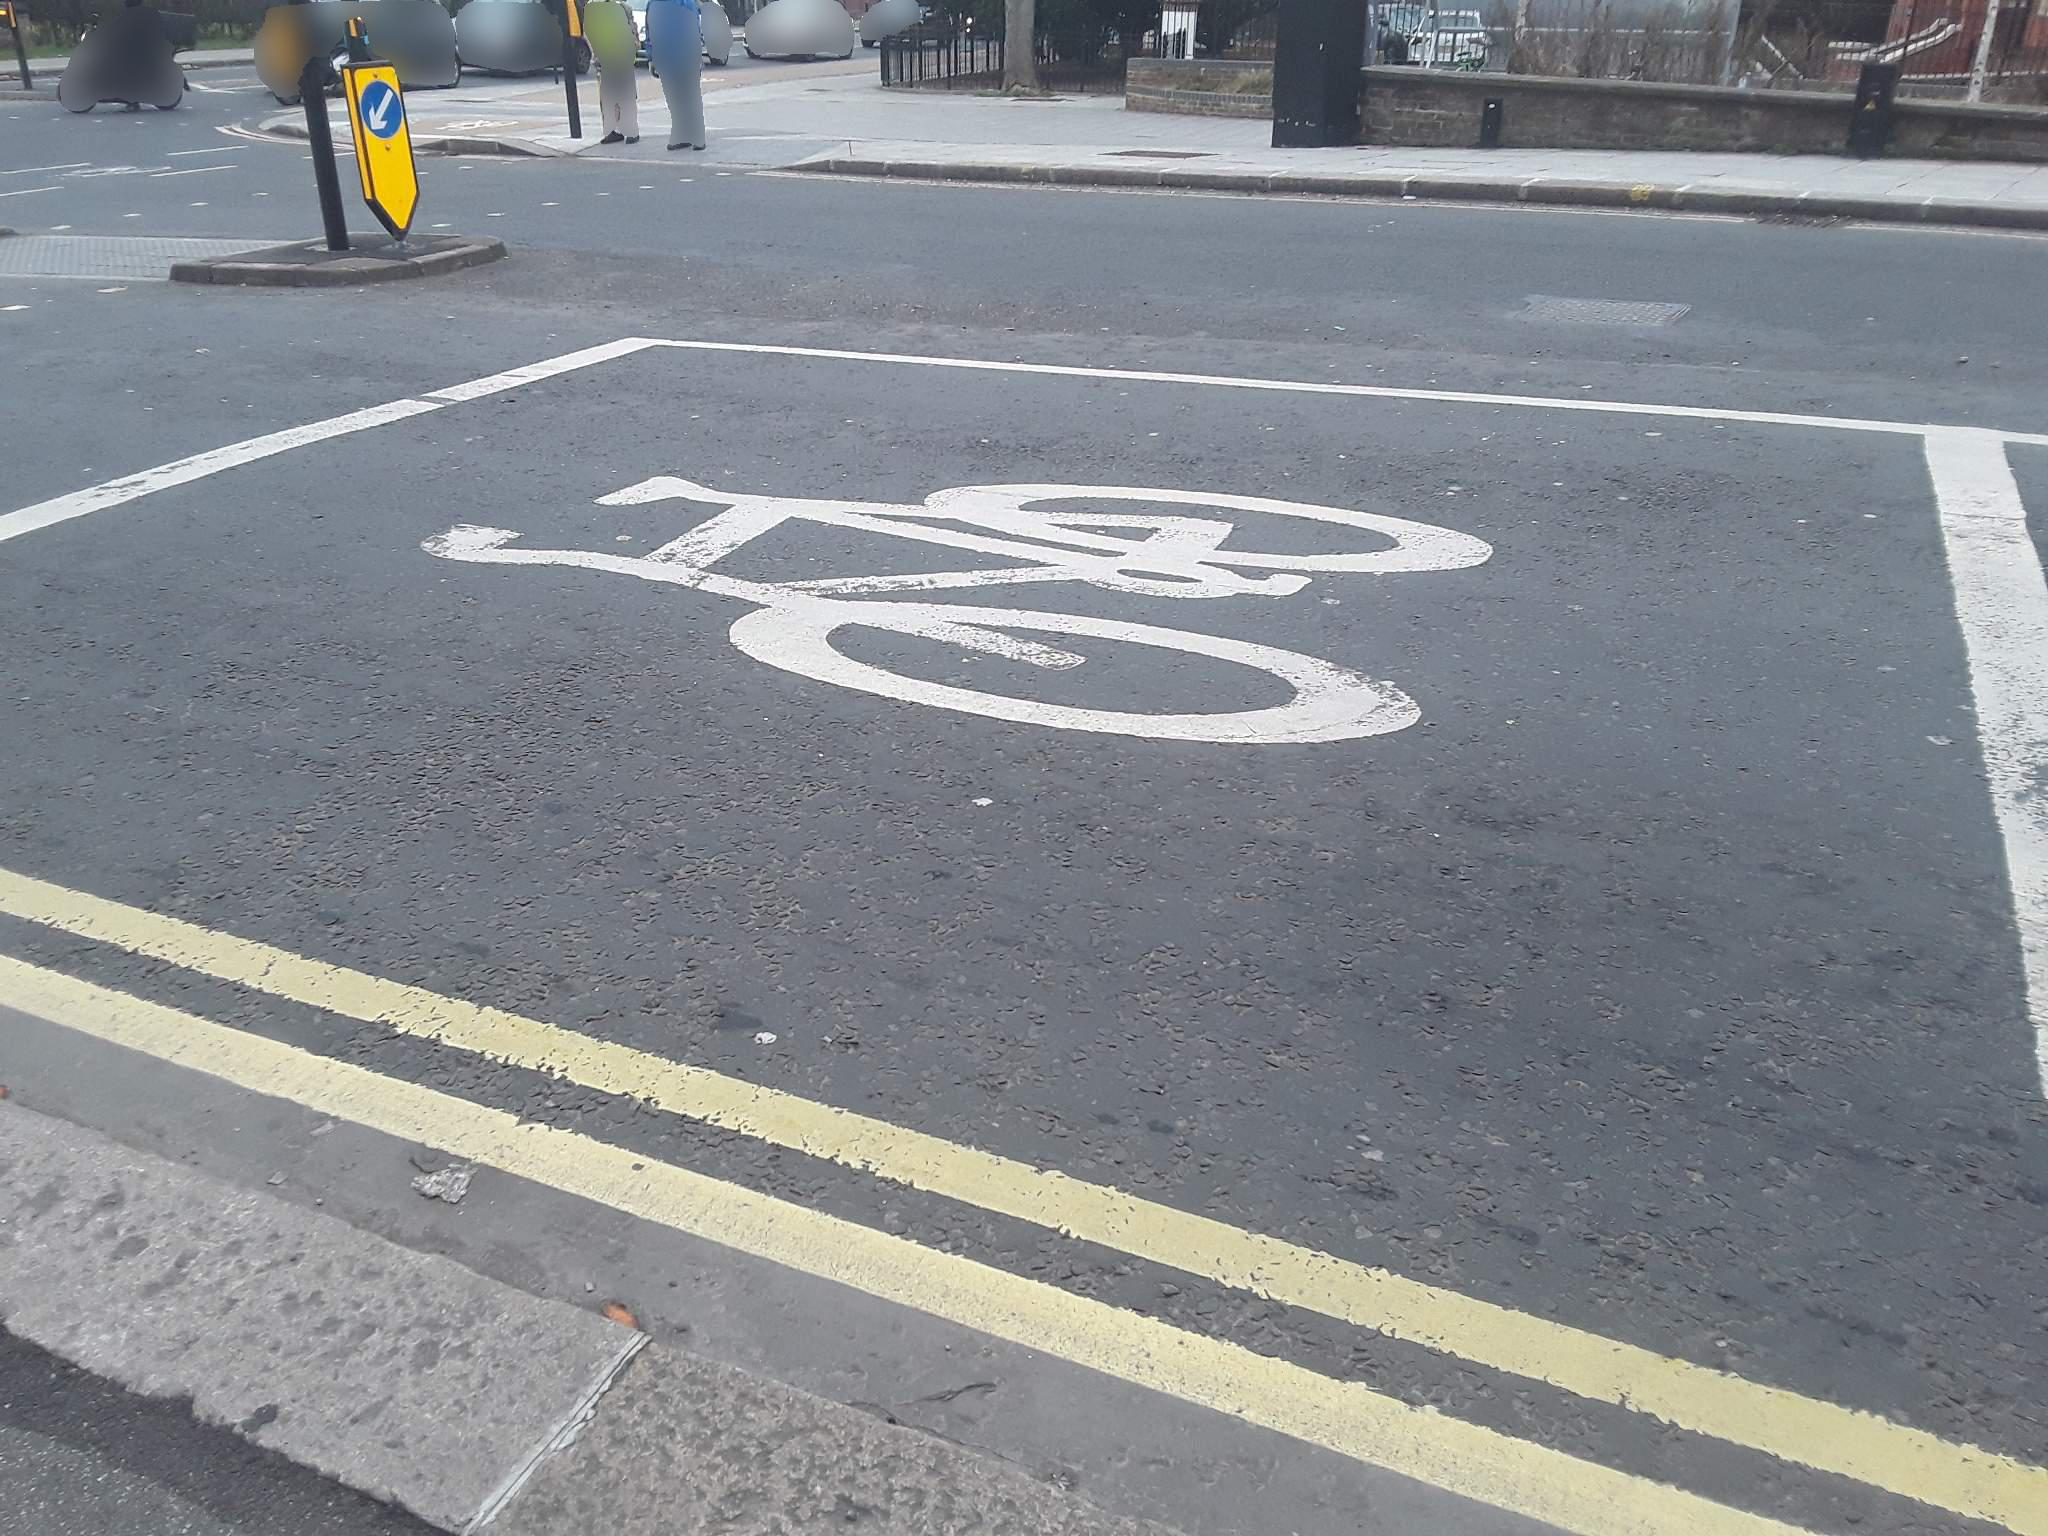

In [91]:

import IPython.display as Disp
url_photo = df_asl.loc[(1,'properties')].PHOTO1_URL
Disp.Image(requests.get(url_photo).content)

### Visualise the borough wise Advanced Stop Lanes

Text(0.5, 1.0, 'Advanced Stop Lines Wise')

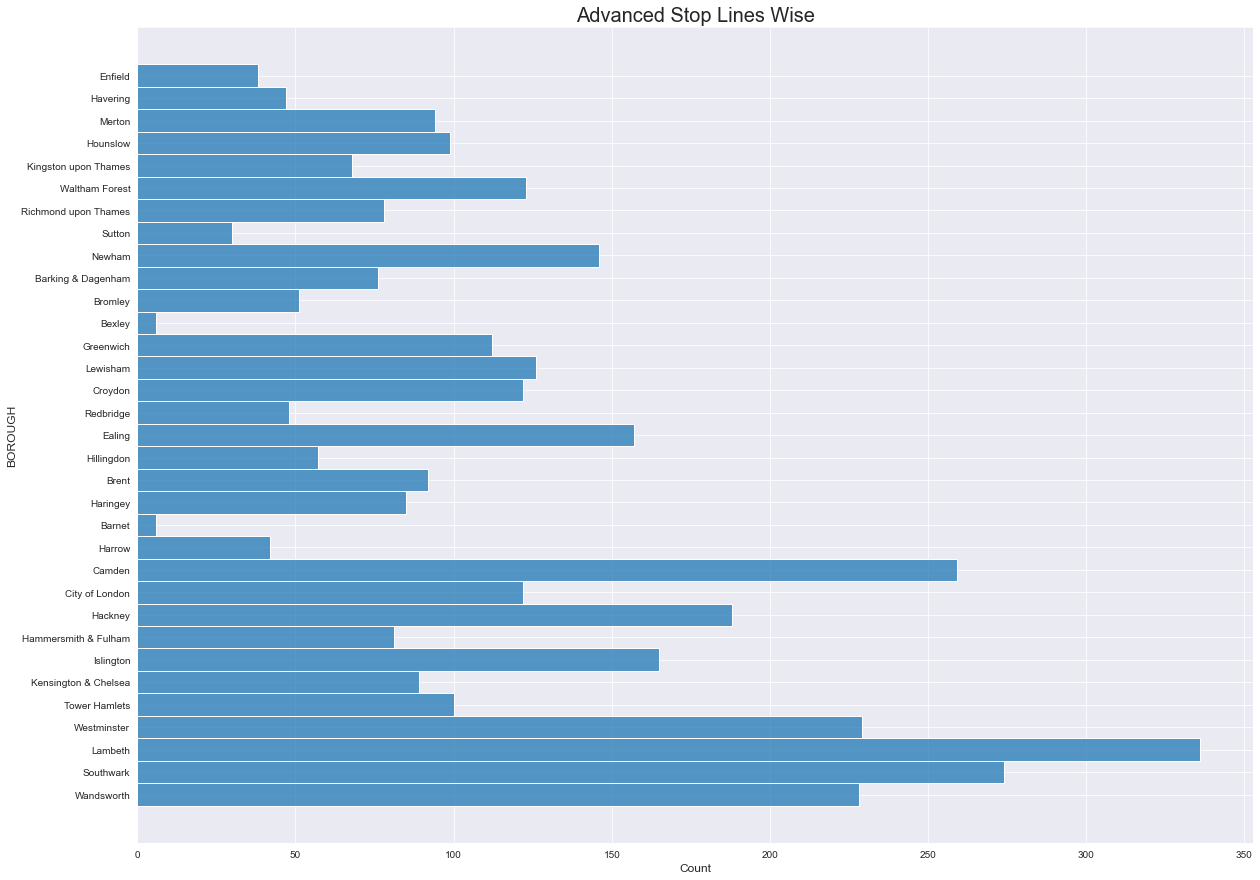

In [92]:

df_asl_borough = df_asl.loc(axis=0)[:,('properties')].BOROUGH.value_counts() 
fig,ax = plt.subplots()
sns.histplot(df_asl.loc(axis=0)[:,('properties')],y='BOROUGH')
ax.set_title('Advanced Stop Lines Wise', fontsize=20)

In [93]:
# convert the value counts borough wise to a df
df_asl_borough=pd.DataFrame(df_asl_borough)
df_asl_borough=df_asl_borough.reset_index()
df_asl_borough=df_asl_borough.rename(columns={'index':'Borough','BOROUGH':'asl_count'})


In [94]:
# view the borough counts
df_asl_borough

Borough  asl_count
0                Lambeth        336
1              Southwark        274
2                 Camden        259
3            Westminster        229
4             Wandsworth        228
5                Hackney        188
6              Islington        165
7                 Ealing        157
8                 Newham        146
9               Lewisham        126
10        Waltham Forest        123
11               Croydon        122
12        City of London        122
13             Greenwich        112
14         Tower Hamlets        100
15              Hounslow         99
16                Merton         94
17                 Brent         92
18  Kensington & Chelsea         89
19              Haringey         85
20  Hammersmith & Fulham         81
21  Richmond upon Thames         78
22    Barking & Dagenham         76
23  Kingston upon Thames         68
24            Hillingdon         57
25               Bromley         51
26             Redbridge         48
27              Havering         47
28                Harrow         42
29               Enfield         38
30                Sutton         30
31                Bexley          6
32                Barnet          6

In [95]:
merged = merged.join(df_asl_borough.set_index('Borough'))
merged.head()

GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
NAME                                                                         
Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
Croydon               E09000008   8649.441       0.000         F       NaN   
Bromley               E09000006  15013.487       0.000         F       NaN   
Hounslow              E09000018   5658.541      60.755         F       NaN   
Ealing                E09000009   5554.428       0.000         F       NaN   

                      SUB_2006  \
NAME                             
Kingston upon Thames       NaN   
Croydon                    NaN   
Bromley                    NaN   
Hounslow                   NaN   
Ealing                     NaN   

                                                               geometry  \
NAME                                                                      
Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
Croydon               POLYGON ((535009.200 159504.700, 535005.500 15...   
Bromley               POLYGON ((540373.600 157530.400, 540361.200 15...   
Hounslow              POLYGON ((521975.800 178100.000, 521967.700 17...   
Ealing                POLYGON ((510253.500 182881.600, 510249.900 18...   

                      signage_count  tr_calm_count  signals_count  \
NAME                                                                
Kingston upon Thames         3095.0         1300.0            4.0   
Croydon                      5581.0         2167.0            2.0   
Bromley                      2752.0          795.0            2.0   
Hounslow                     3521.0         1365.0            NaN   
Ealing                       4516.0         2879.0            1.0   

                      cycle_park_count  cycle_tracks_count  asl_count  
NAME                                                                   
Kingston upon Thames             357.0               694.0       68.0  
Croydon                          414.0               915.0      122.0  
Bromley                          299.0               491.0       51.0  
Hounslow                         695.0              1135.0       99.0  
Ealing                           980.0              1228.0      157.0

In [96]:
merged.loc["Wandsworth"]

GSS_CODE                                                      E09000032
HECTARES                                                       3522.022
NONLD_AREA                                                         95.6
ONS_INNER                                                             T
SUB_2009                                                            NaN
SUB_2006                                                            NaN
geometry              POLYGON ((523489.6 176224.8, 523500.6 176218.4...
signage_count                                                   11258.0
tr_calm_count                                                    2001.0
signals_count                                                      17.0
cycle_park_count                                                  759.0
cycle_tracks_count                                                971.0
asl_count                                                         228.0
Name: Wandsworth, dtype: object

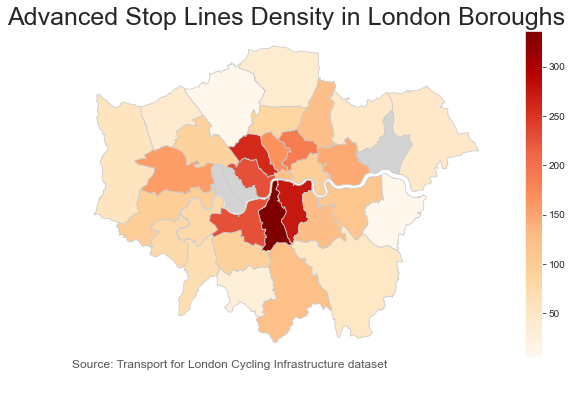

In [97]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'asl_count'
# set the range for the choropleth
vmin, vmax = df_asl_borough.asl_count.max(), df_asl_borough.asl_count.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',missing_kwds = {"color":"lightgrey"})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Advanced Stop Lines Density in London Boroughs', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Transport for London Cycling Infrastructure dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

### Scope for Improvement 

- visualise the line assets with start and end coordinates as a route on the maps
- visualise the data points on the map more clearly with boroughs marked clearly 
- combine with other datasets available on the open london database for more insights